# **Project Name**    - Flipkart Customer Service Satisfaction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project focused on estimating the factors that influence customer satisfaction and finding strategies to enhance overall experience. Using a dataset of customer interactions, which contains information about the details of the purchase and isuues related to those products and the effeciency in solving them.
This data is analysed using various chart for better understanding of the corelations among variables through visual representations. The data is then preprocessed to handle missing values and outliers, and important features are extracted. It is then standardized to ensure consistent scaling, making it easier for the machine learning models to process and learn from the data effectively.

Three tree-based models were implemented: Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. These models were chosen for their ability to handle both numeric and categorical features, capture non-linear relationships, and provide feature importance for actionable insights. To improve model performance, Bayesian Optimization (BayesSearchCV) was applied for hyperparameter tuning. This approach efficiently explores the hyperparameter space, learning from previous evaluations to find optimal parameters, resulting in higher accuracy and better generalization.

Models were evaluated using RMSE and R² Score, which measure prediction error and variance explained, respectively. Additionally, CSAT scores were categorized into Low, Medium, and High, enabling proactive identification of dissatisfied customers. Factors like issue resolution time, product quality, and support responsiveness emerged as the most influential, guiding businesses on where to focus improvements.
By understanding the key drivers of customer satisfaction, businesses can make data-driven decisions to enhance service quality, optimize operations, and improve retention. This approach demonstrates the strategic value of machine learning in improving customer experience and driving positive business outcomes.

# **GitHub Link -**

https://github.com/AkhilaRao0002





# **Problem Statement**


Customer satisfaction is a critical factor for business growth and retention, yet many organizations struggle to understand what drives satisfaction and predict it accurately. The goal of this project is to develop machine learning models that analyses customer satisfaction scores (CSAT) based on service, product, and interaction data and to identify the key factors influencing satisfaction. By accurately forecasting satisfaction levels and understanding the drivers behind them, businesses can take proactive, data-driven actions to enhance the customer experience, reduce churn, and improve overall operational efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [41]:
# Load Dataset
data = pd.read_csv('/content/Customer_support_data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows = data.shape[0]
columns = data.shape[1]
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicate values: {data.duplicated().sum()}")

Number of duplicate values: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Column Names','Null count']
print(missing_values)
print(f"\nTotal number of missing values in the dataset: {data.isnull().sum().sum()}")

               Column Names  Null count
0                 Unique id           0
1              channel_name           0
2                  category           0
3              Sub-category           0
4          Customer Remarks       57165
5                  Order_id       18232
6           order_date_time       68693
7         Issue_reported at           0
8           issue_responded           0
9      Survey_response_Date           0
10            Customer_City       68828
11         Product_category       68711
12               Item_price       68701
13  connected_handling_time       85665
14               Agent_name           0
15               Supervisor           0
16                  Manager           0
17            Tenure Bucket           0
18              Agent Shift           0
19               CSAT Score           0

Total number of missing values in the dataset: 435995


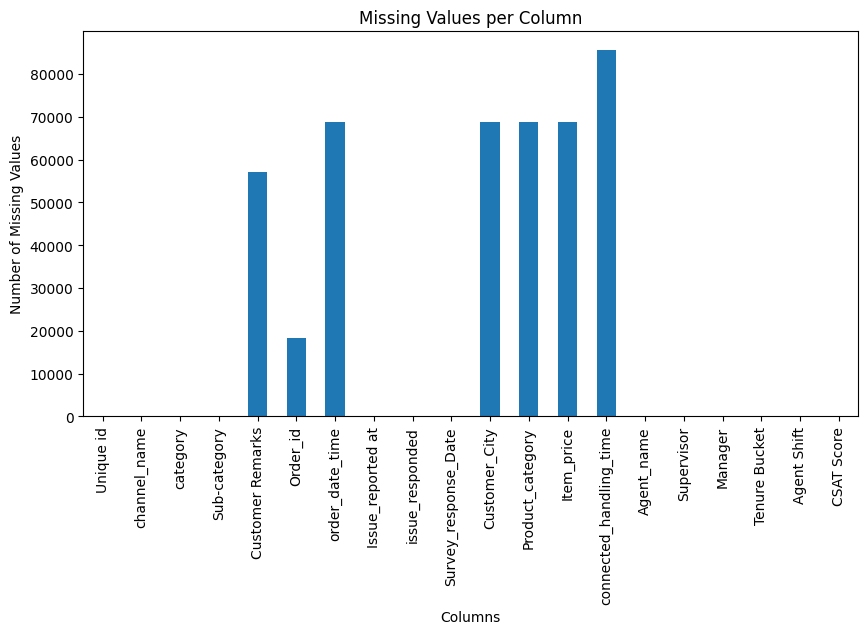

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 5))
data.isnull().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()

### What did you know about your dataset?

The dataset consists of information about the observations made on customer feedback through various channels on Flipkart application. The dataset comprises 85,907 rows and 20 columns, with unique entries. Unique id is the primary key in the dataset. The datapoints are of object, float and int datatype. It includes a mix of categorical and numerical features such as issue category, sub-category, communication channel, priority level, customer type, agent details, and ticket status, along with quantitative fields like response time, resolution time, and customer ratings. The dataset also contains some missing values across selected columns, which require preprocessing before analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

The dataset comprises of both numerical and categorical varaiables. Each record is uniquely identified and includes details such as service channel, issue category, and customer feedback. Transaction-related information like order ID, order date, product category, and item price is also included.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'Unique id':
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880' ...
 '723bce2c-496c-4aa8-a64b-ca17004528f0'
 '707528ee-6873-4192-bfa9-a491f1c08ab5'
 '07c7a878-0d5a-42e0-97ef-de59abec0238']

Unique values for column 'channel_name':
['Outcall' 'Inbound' 'Email']

Unique values for column 'category':
['Product Queries' 'Order Related' 'Returns' 'Cancellation'
 'Shopzilla Related' 'Payments related' 'Refund Related' 'Feedback'
 'Offers & Cashback' 'Onboarding related' 'Others' 'App/website']

Unique values for column 'Sub-category':
['Life Insurance' 'Product Specific Information' 'Installation/demo'
 'Reverse Pickup Enquiry' 'Not Needed' 'Fraudulent User'
 'Exchange / Replacement' 'Missing' 'General Enquiry' 'Return request'
 'Delayed' 'Service Centres Related' 'Payment related Queries'
 'Order status enquiry' 'Return cancellation' 'Unable to track'
 'Seller Cancelled Order' 'Wrong' 'Invoice requ

## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
#Calculating missing value percentage fo every variable
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent.sort_values(ascending=False))

connected_handling_time    99.718300
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
order_date_time            79.962052
Customer Remarks           66.542889
Order_id                   21.222950
Unique id                   0.000000
Sub-category                0.000000
category                    0.000000
channel_name                0.000000
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64


In [43]:
for column in data.columns:
    # Columns having more than 70% missing values
    if missing_percent[column] > 70:
        data.drop(columns=[column], inplace=True)

    # Columns having moderate missing values
    elif 10 < missing_percent[column] <= 70:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna("Not Provided")
        else:
            data[column] = data[column].fillna(data[column].median())

    # Columns with very few missing values
    elif missing_percent[column] > 0:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())

In [5]:
print(f"Total missing values in the data after data wrangling: {data.isnull().sum().sum()}")

Total missing values in the data after data wrangling: 0


### What all manipulations have you done and insights you found?

Handling missing values - The dataset contains few columns with large number of missing values, few columns with moderate missing values and few columns with very few missing values. Columns containing more than 70% missing values are removed from the dataset. For columns containing around lesser number of missing data, the missing values are replaced with standard values such as "not provided" for text data and statistical values such as mean, median or mode of the values in that column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

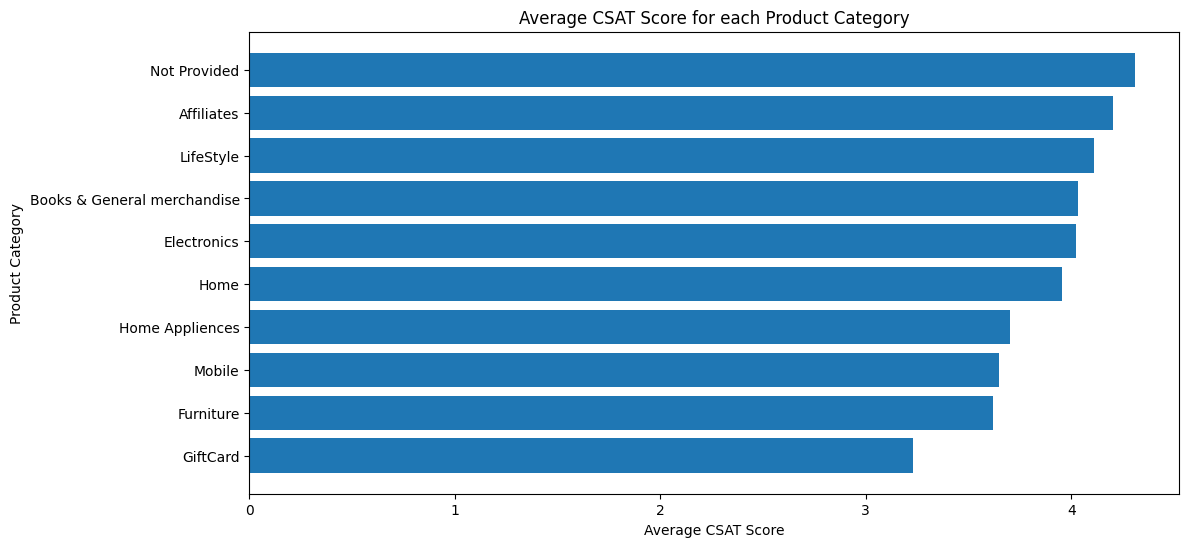

In [ ]:
# Chart - 1 visualization code.
# Calculate the average CSAT Score for each Product_category
avg_csat_by_category = data.groupby('Product_category')['CSAT Score'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(avg_csat_by_category.index, avg_csat_by_category.values)
plt.title("Average CSAT Score for each Product Category")
plt.xlabel("Average CSAT Score")
plt.ylabel("Product Category")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are best suited for visual representation of categorical value against numerical values. It represents average CSAT score for each category of the products.

##### 2. What is/are the insight(s) found from the chart?

Customer Satisfaction Scores range from values 0-5 where 5 being the highest and 0 being the lowest. CSAT scores are higher for product categories such as affiliates, lifestyle, ooks and electronics indicating significant customer satisfaction and is lower for categories such as gifcards and furniture indicating lower satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that the category of the products purchased by the customers has a significant role in determining the Customer Satisfaction scores. The feedack from customers depends on the type of producct being purchased. The categeroies with lower scores can be analysed to improve the satisfacction scores.
Negative Insight - A significant portion of categorical data is missing, which may lead to incomplete or misleading interpretation of the results.

#### Chart - 2

/tmp/ipython-input-2641410097.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Resolution Time Category')['CSAT Score']


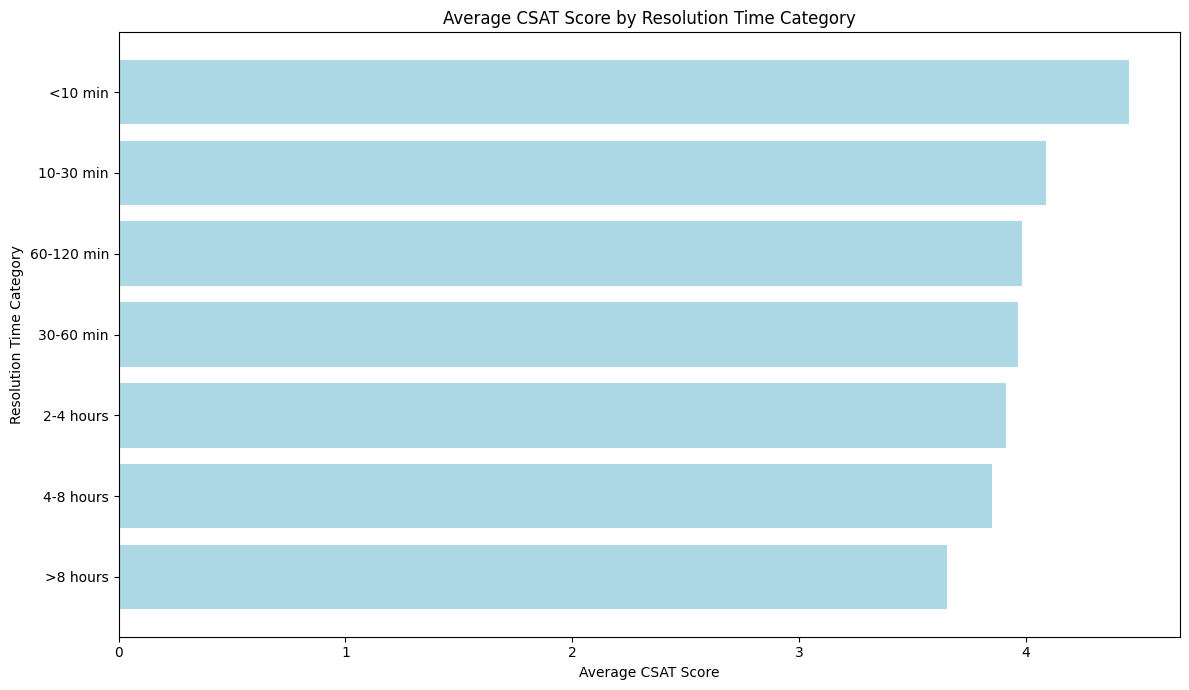

In [44]:
# Chart - 2 visualization code.
# Convert to datetime (robust to mixed formats)
data['Issue_reported at'] = pd.to_datetime(
    data['Issue_reported at'],
    dayfirst=True,
    format='mixed',
    errors='coerce'
)

data['issue_responded'] = pd.to_datetime(
    data['issue_responded'],
    dayfirst=True,
    format='mixed',
    errors='coerce'
)

# Calculate Resolution Time
data['Resolution Time'] = data['issue_responded'] - data['Issue_reported at']

# Convert to minutes
data['Resolution Time (minutes)'] = data['Resolution Time'].dt.total_seconds() / 60

# Remove invalid or negative values
data = data[data['Resolution Time (minutes)'] >= 0]

# Create bins
bins = [0, 10, 30, 60, 120, 240, 480, data['Resolution Time (minutes)'].max()]
labels = ['<10 min', '10-30 min', '30-60 min', '60-120 min', '2-4 hours', '4-8 hours', '>8 hours']

data['Resolution Time Category'] = pd.cut(
    data['Resolution Time (minutes)'],
    bins=bins,
    labels=labels,
    right=False
)

# Average CSAT by resolution category
avg_csat_by_resolution = (
    data.groupby('Resolution Time Category')['CSAT Score']
        .mean()
        .sort_values(ascending=True)
)

# Plot
plt.figure(figsize=(12, 7))
plt.barh(avg_csat_by_resolution.index, avg_csat_by_resolution.values, color = 'lightblue')
plt.title("Average CSAT Score by Resolution Time Category")
plt.xlabel("Average CSAT Score")
plt.ylabel("Resolution Time Category")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how CSAT scores vary with the time taken to respond to customer issues. A bar chart makes it easy to compare average CSAT scores across these time buckets.

##### 2. What is/are the insight(s) found from the chart?

This visualization analyzes the impact of issue response time on customer satisfaction (CSAT) scores. It highlights that quicker the issue is responded to greater is the customer satisfaction level.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increasing the response speed in resolving customer issues has a significant positive impact on customer satisfaction. Faster issue resolution leads to higher CSAT scores, as customers value timely and efficient support. This highlights the importance of minimizing response times to improve overall customer experience.

#### Chart - 3

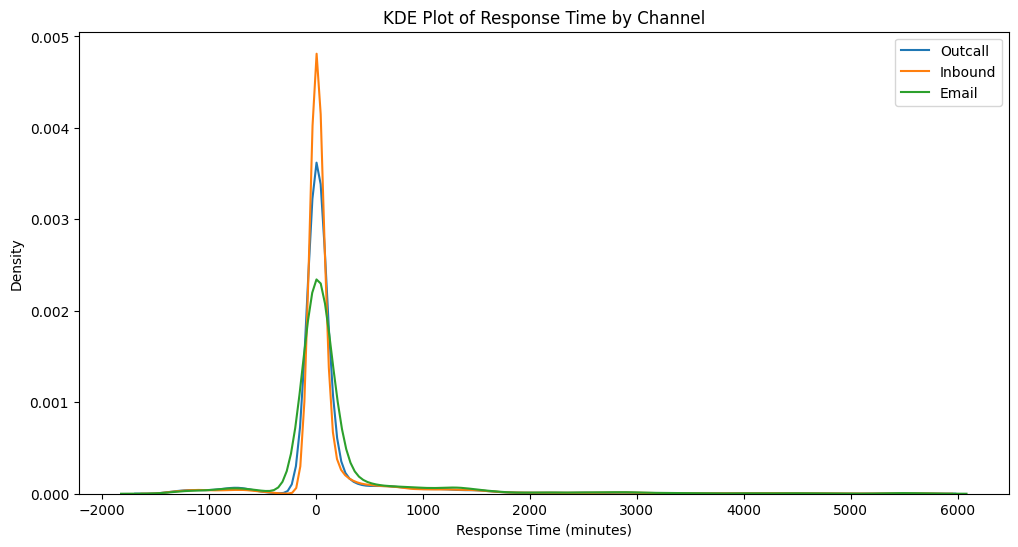

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
for channel in data['channel_name'].unique():
    sns.kdeplot(
        data[data['channel_name'] == channel]['Resolution Time (minutes)'],
        label=channel
    )

plt.xlabel('Response Time (minutes)')
plt.ylabel('Density')
plt.title('KDE Plot of Response Time by Channel')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The chart shows the entire distribution of resolution times for each channel, rather than just averages. This helps identify which channels consistently experience longer response times.

##### 2. What is/are the insight(s) found from the chart?

The plot shows that while most issues across all channels are resolved quickly, inbound support demonstrates the most consistent and efficient response times. Email support exhibits greater variability and longer delays, as indicated by its extended right tail.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identification of the channels which leads to quicker responses to customer issues can be used to improve the customer satisfaction score. As the CSAT scroe is higher for quicker response time, the response can be improved by greater usage of channels which lead to efficient and quick response.

#### Chart - 4

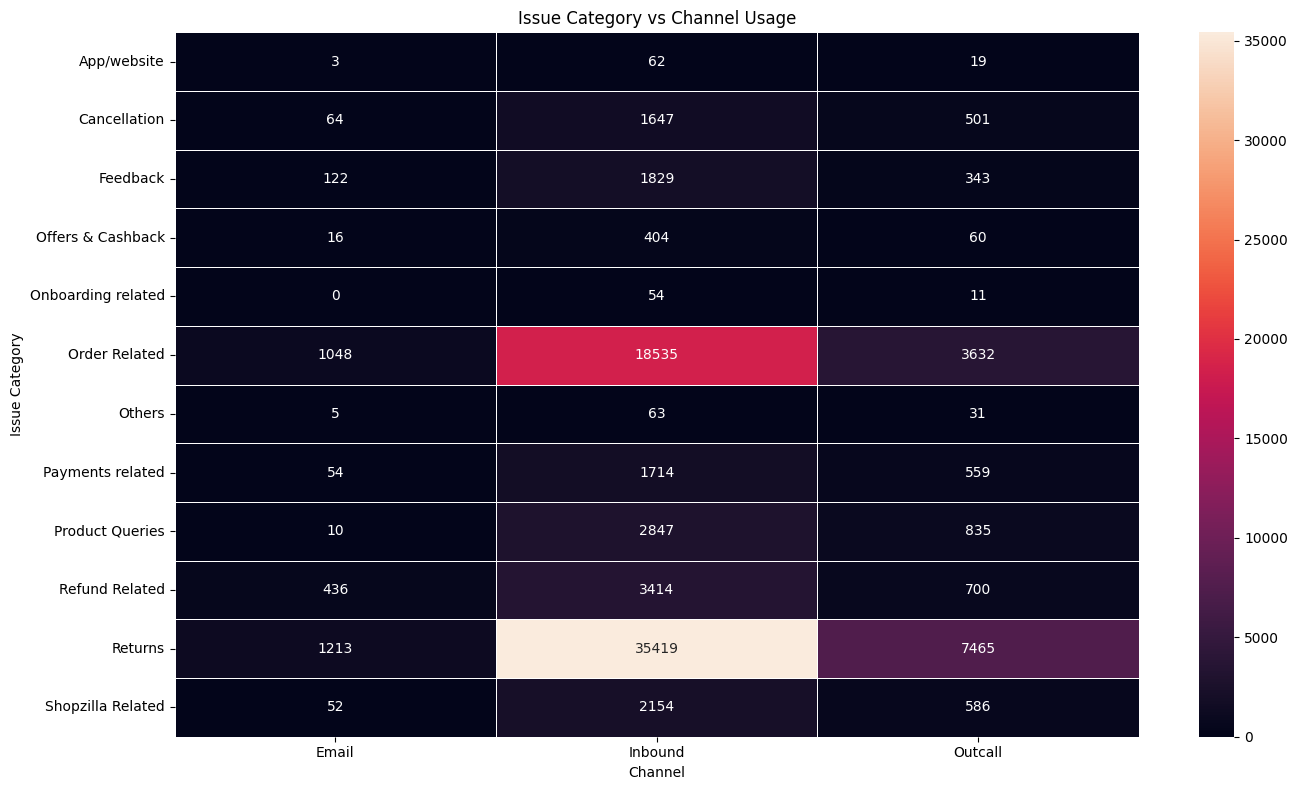

In [ ]:
# Chart - 4 visualization code
pivot_table = pd.pivot_table(
    data,
    index='category',        # rows
    columns='channel_name',        # columns
    aggfunc='size',                # count occurrences
    fill_value=0
)
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='d',
    linewidths=0.5
)

plt.title('Issue Category vs Channel Usage')
plt.xlabel('Channel')
plt.ylabel('Issue Category')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart illustrates how different issue categories are distributed across various communication channels used for customer issue resolution. It helps identify which channels are most frequently utilized for specific categories, providing insights into channel effectiveness and customer preferences.


##### 2. What is/are the insight(s) found from the chart?

In the previous chart, it was found that issues resolved through inbound channels have quicker response time leading to higher customer satisfaction score. This chart shows the number issues solved using these channels for each category. Most of the issues utilise inbound channels which improves performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the issues accross different categories majorly make use of inbount channels for issue resolvement, which has a positive impact on CSAT Scores. However attempt can be improve the usage of more efficient channels frequently.

#### Chart - 5

<Figure size 1400x600 with 0 Axes>

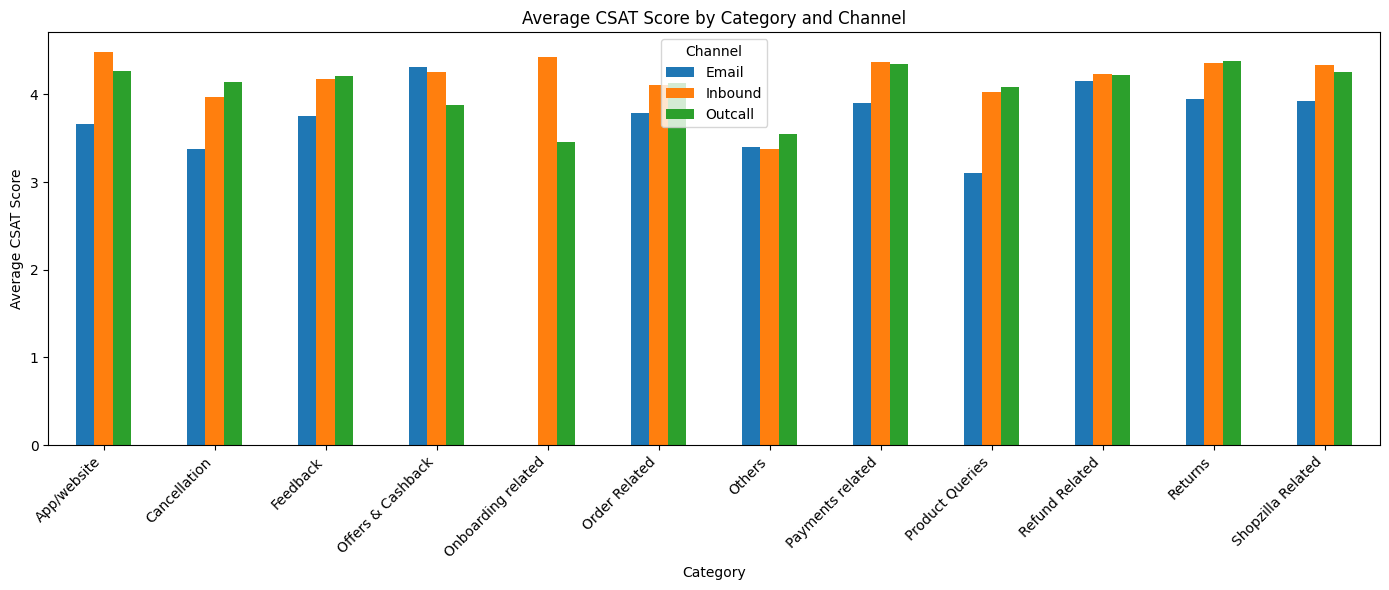

In [ ]:
# Chart - 5 visualization code
# Calculate average CSAT by Category and Channel
avg_csat_cat_channel = (
    data.groupby(['category', 'channel_name'])['CSAT Score']
        .mean()
        .unstack()   # Converts channel_name into columns
)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
avg_csat_cat_channel.plot(
    kind='bar',
    figsize=(14, 6)
)

plt.xlabel('Category')
plt.ylabel('Average CSAT Score')
plt.title('Average CSAT Score by Category and Channel')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart compares the CSAT score for each issue category responded through various channels. It helps in understanding the performance through a visual comparison.

##### 2. What is/are the insight(s) found from the chart?

Issue categories utilizing inbound channels for issue resoluton have better CSAT scores than those categories which make use of outcal and email channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Increasing the usage of inbound channels for issue resolution will lead to improved customer satisfaction

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
import plotly.express as px

# Count issues per Category and Sub-Category
counts = (
    data.groupby(['category', 'Sub-category'])
        .size()
        .reset_index(name='Count')
)

fig = px.treemap(
    counts,
    path=['category', 'Sub-category'], # Corrected path column names to match DataFrame
    values='Count',
    title='Category and Sub-Category Distribution'
)

fig.show()

##### 1. Why did you pick the specific chart?

This chart is best suited for understanding the subcategories of each category of issues. It represents each catergory along with its subcategories which makes it easier to analyse the data.

##### 2. What is/are the insight(s) found from the chart?

Categories such as Returns and order related issues have many subcategories when compared to categories such as onboarding and cashback related issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding subcategories provides deeper insight into the specific types of issues customers face within a broader category. This helps in identifying recurring problem areas, prioritize targeted improvements, allocate resources more effectively, and design specialized resolution strategies that improve efficiency and customer satisfaction.

#### Chart - 7

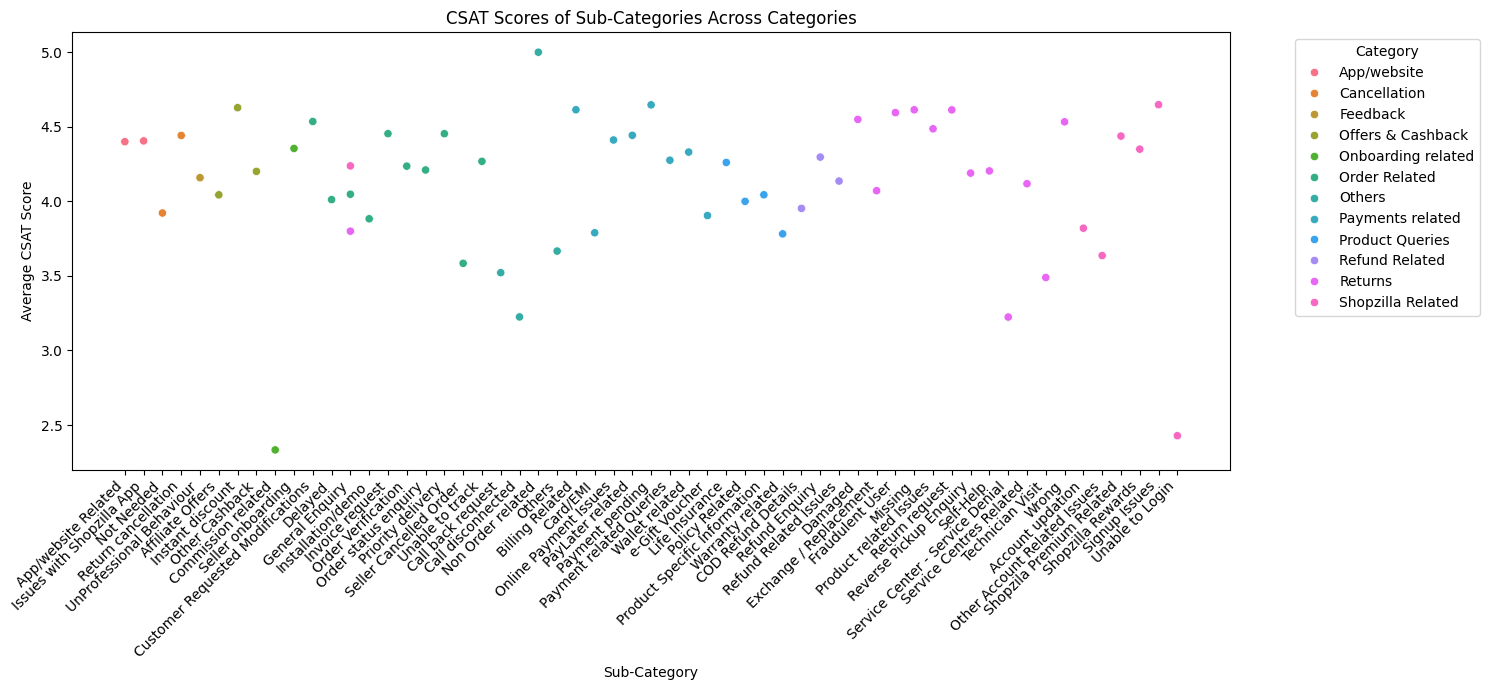

In [ ]:
# Chart - 7 visualization code
# Calculate average CSAT for each sub-category within each category
subcat_csat = (
    data.groupby(['category', 'Sub-category'])['CSAT Score']
        .mean()
        .reset_index()
)

# Scatter plot
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=subcat_csat,
    x='Sub-category',
    y='CSAT Score',
    hue='category'
)

plt.xlabel('Sub-Category')
plt.ylabel('Average CSAT Score')
plt.title('CSAT Scores of Sub-Categories Across Categories')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is best sutited to represent CSAT scores of each sub-category within a category. Each color represents a category and number of datapoints represent the sub categories of each category.

##### 2. What is/are the insight(s) found from the chart?

Sub-categories of onboarding and shopzilla related categories have lower CSAT scores compared to other categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The categories with lower CSAT scores can be improved by identifying the specific sub-categories driving dissatisfaction, reducing resolution time through process optimization, and assigning experienced or high-performing agents to handle these issues.

#### Chart - 8

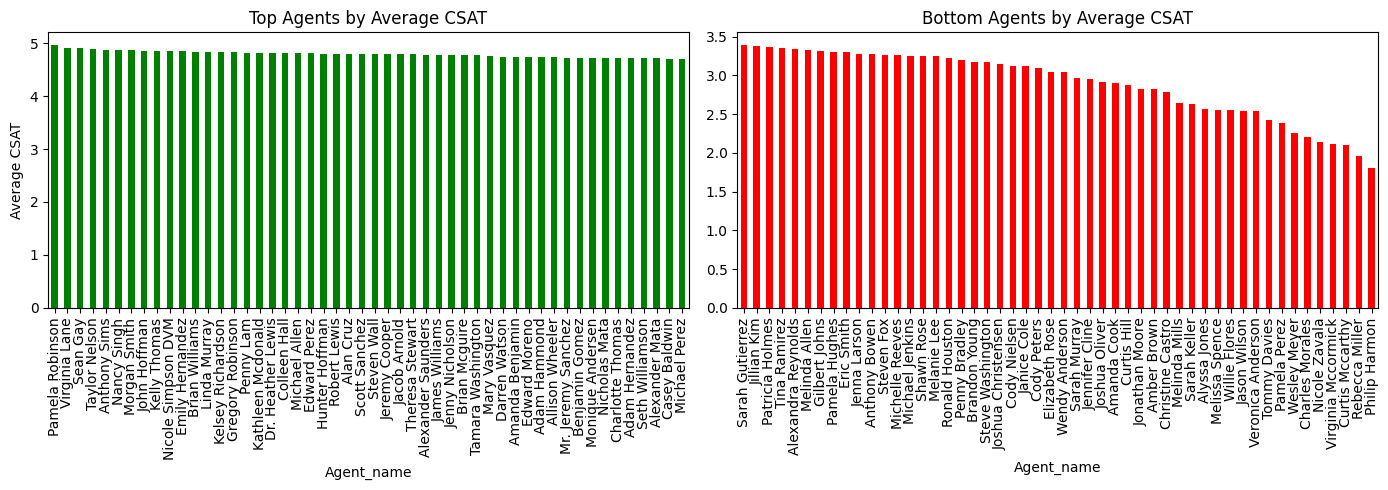

In [ ]:
# Chart - 8 visualization code
avg_csat_agent = data.groupby('Agent_name')['CSAT Score'].mean()

top_agents = avg_csat_agent.nlargest(50)
bottom_agents = avg_csat_agent.nsmallest(50).sort_values(ascending=False)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
top_agents.plot(kind='bar' ,color ='Green')
plt.title('Top Agents by Average CSAT')
plt.ylabel('Average CSAT')

plt.subplot(1, 2, 2)
bottom_agents.plot(kind='bar', color ='Red')
plt.title('Bottom Agents by Average CSAT')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart highlights agents with the highest and lowest average CSAT scores, enabling a clear comparison of top and underperforming agents. It helps identify best practices from high performers and areas for improvement among agents with lower customer satisfaction.


##### 2. What is/are the insight(s) found from the chart?

This chart helps us understand the performance of different agents with respect to CSAT scores by providing a comparitive demonstration. It shows that the performance of agents can also be a factor influencing customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the comparison, it can be inferred that engaging agents with higher CSAT scores more frequently in customer issue resolution can help improve overall customer satisfaction levels.


#### Chart - 9

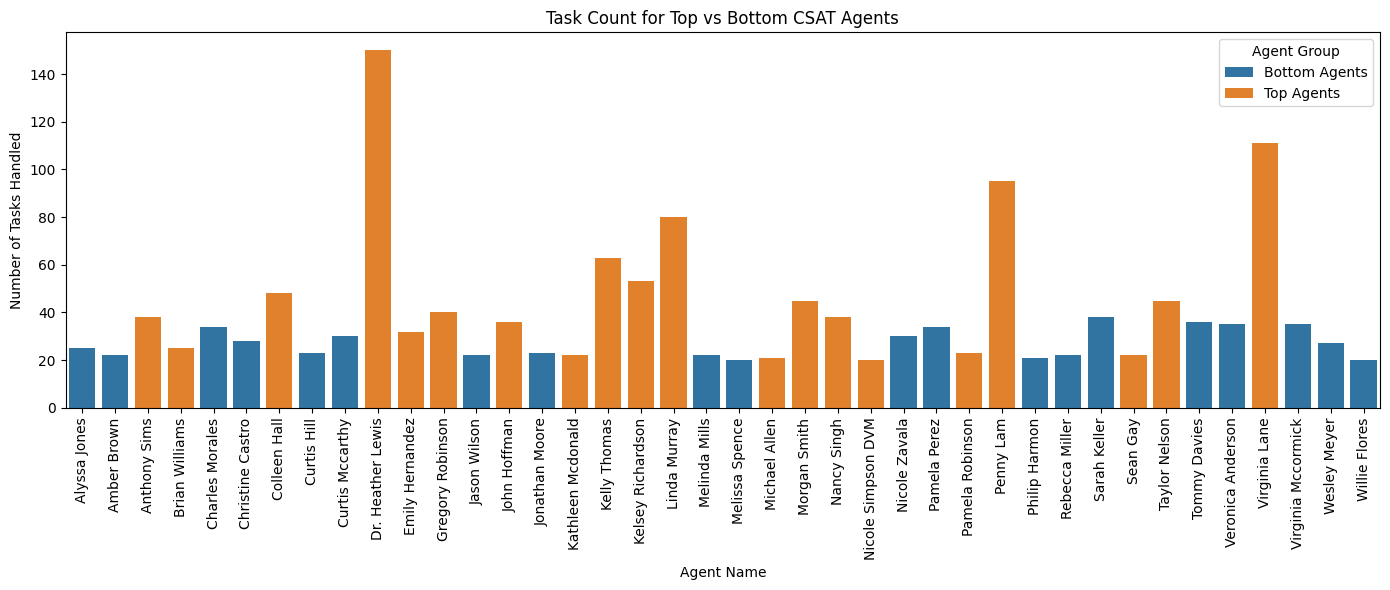

In [ ]:
# Chart - 9 visualization code
# Average CSAT per agent
avg_csat_agent = data.groupby('Agent_name')['CSAT Score'].mean()

# Select top and bottom agents
top_agents = avg_csat_agent.nlargest(20).index
bottom_agents = avg_csat_agent.nsmallest(20).index

# Filter dataset for these agents
filtered_data = data[data['Agent_name'].isin(top_agents.union(bottom_agents))]

# Count occurrences (each row = one task)
task_counts = (
    filtered_data
    .groupby('Agent_name')
    .size()
    .reset_index(name='Task Count')
)

# Label agent group
task_counts['Agent Group'] = task_counts['Agent_name'].apply(
    lambda x: 'Top Agents' if x in top_agents else 'Bottom Agents'
)

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=task_counts,
    x='Agent_name',
    y='Task Count',
    hue='Agent Group'
)

plt.title('Task Count for Top vs Bottom CSAT Agents')
plt.xlabel('Agent Name')
plt.ylabel('Number of Tasks Handled')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart is optimal for comparing the number of tasks assigned to top-performing agents versus lower-performing agents. It clearly highlights differences in workload distribution and helps assess whether tasks are being allocated effectively based on agent performance.


##### 2. What is/are the insight(s) found from the chart?

This chart depicts that larger number of tasks are handled by Agents with higher CSAT scores than agents with lower CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A larger number of tasks are handled by top-performing agents, which contributes to higher customer satisfaction levels. This suggests that leveraging experienced and high-performing agents more frequently can lead to improved overall service quality.


#### Chart - 10

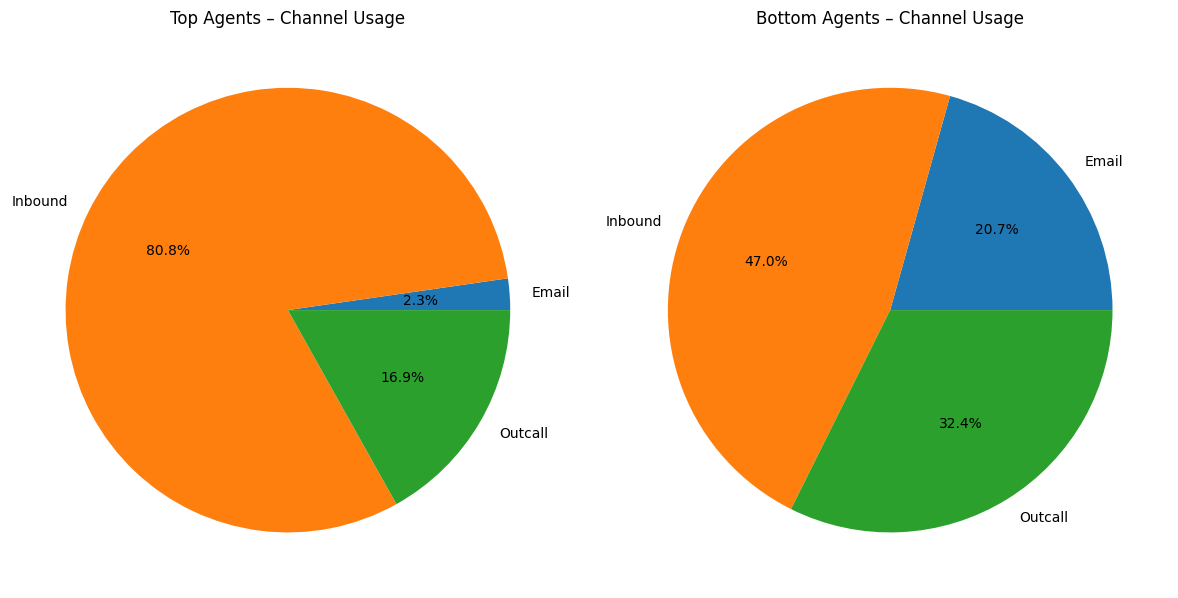

In [ ]:
# Average CSAT per agent
avg_csat_agent = data.groupby('Agent_name')['CSAT Score'].mean()

# Select top and bottom agents
top_agents = avg_csat_agent.nlargest(20).index
bottom_agents = avg_csat_agent.nsmallest(20).index

# ✅ Make an explicit copy
filtered_data = data[
    data['Agent_name'].isin(top_agents.union(bottom_agents))
].copy()

# Safely assign Agent Group
filtered_data['Agent Group'] = filtered_data['Agent_name'].apply(
    lambda x: 'Top Agents' if x in top_agents else 'Bottom Agents'
)

# Count channel usage
channel_comparison = (
    filtered_data
    .groupby(['Agent Group', 'channel_name'])
    .size()
    .reset_index(name='Task Count')
)

# Split data
top_data = channel_comparison[channel_comparison['Agent Group'] == 'Top Agents']
bottom_data = channel_comparison[channel_comparison['Agent Group'] == 'Bottom Agents']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    top_data['Task Count'],
    labels=top_data['channel_name'],
    autopct='%1.1f%%'
)
axes[0].set_title('Top Agents – Channel Usage')

axes[1].pie(
    bottom_data['Task Count'],
    labels=bottom_data['channel_name'],
    autopct='%1.1f%%'
)
axes[1].set_title('Bottom Agents – Channel Usage')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes the distribution of communication channels used by top-performing agents by counting task occurrences. It helps identify which channels are most commonly associated with higher customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Top-performing agents tend to use more efficient communication channels more frequently than lower-performing agents. This consistent use of effective channels likely contributes to faster resolutions and higher overall customer satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top-performing agents consistently use more efficient channels that enable quicker response times, creating a positive impact on customer satisfaction. In contrast, the performance of lower-performing agents can be improved by increasing their use of inbound channels to enhance responsiveness and issue resolution quality.


#### Chart - 11

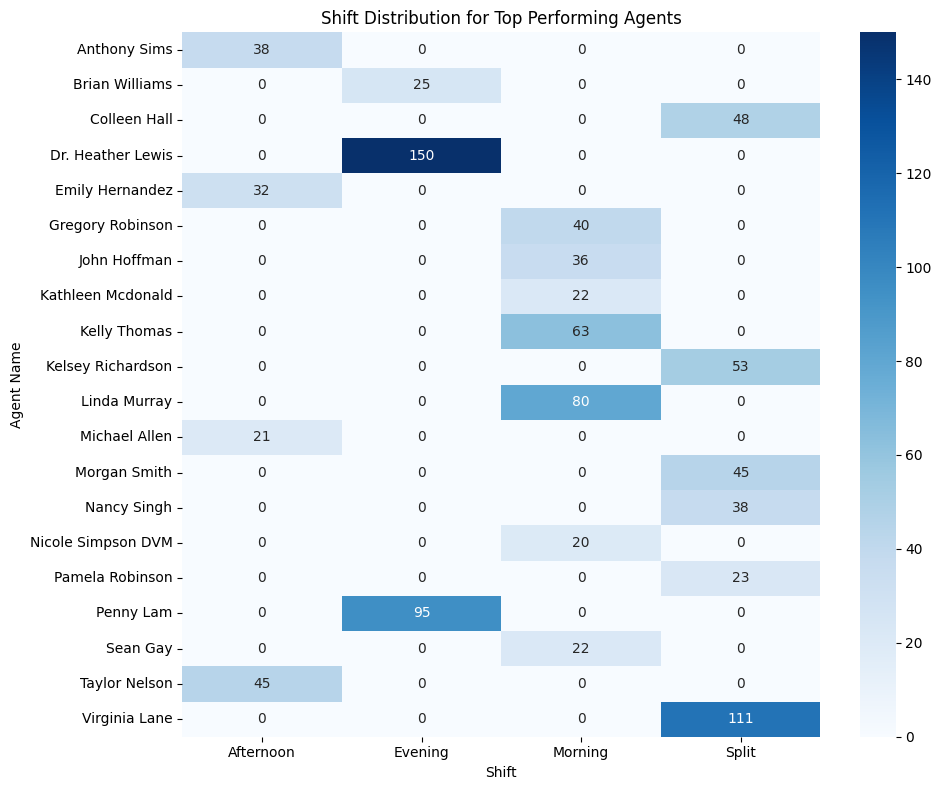

In [ ]:
# Chart - 11 visualization code
# Calculate average CSAT per agent
avg_csat_agent = data.groupby('Agent_name')['CSAT Score'].mean()

# Select top N agents (e.g., top 20)
top_agents = avg_csat_agent.nlargest(20).index
top_agent_data = data[data['Agent_name'].isin(top_agents)].copy()
# Count shift usage per top agent
agent_shift_counts = (
    top_agent_data
    .groupby(['Agent_name', 'Agent Shift'])
    .size()
    .reset_index(name='Task Count')
)

# Pivot for heatmap
heatmap_data = agent_shift_counts.pivot(
    index='Agent_name',
    columns='Agent Shift',
    values='Task Count'
).fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='Blues'
)

plt.xlabel('Shift')
plt.ylabel('Agent Name')
plt.title('Shift Distribution for Top Performing Agents')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This visualization shows the distribution of operating shifts for top-performing agents by counting task occurrences. It helps identify which shifts are most actively handled by high CSAT agents and supports effective shift planning.



##### 2. What is/are the insight(s) found from the chart?

The chart highlights that a larger proportion of top-performing agents are scheduled during morning shifts compared to other shifts.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Plotting top agents and their operating shifts helps identify the time periods when high-performing agents contribute most to customer satisfaction. This insight enables better shift planning and targeted staffing to improve service quality and overall business performance.


#### Chart - 12

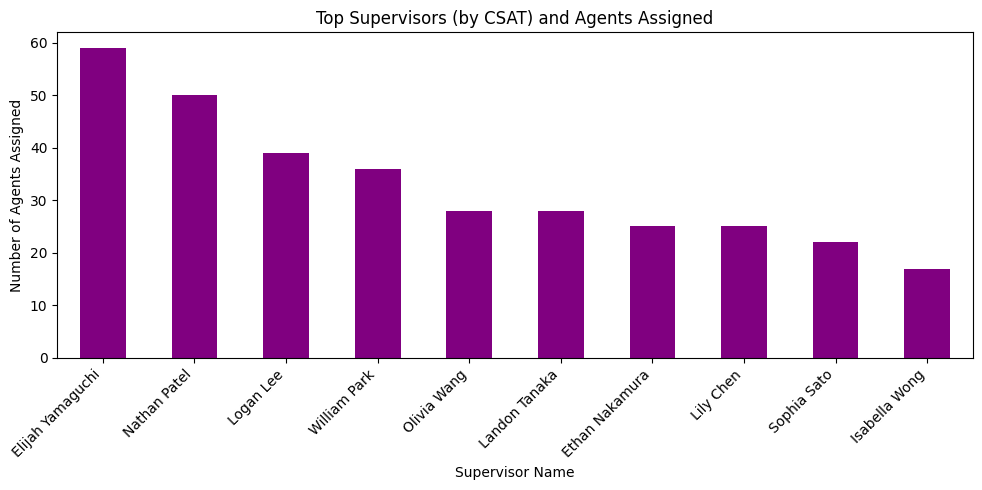

In [ ]:
# Chart - 12 visualization code
import matplotlib.pyplot as plt

# Step 1: Calculate average CSAT per supervisor
avg_csat_supervisor = (
    data.groupby('Supervisor')['CSAT Score']
        .mean()
        .sort_values(ascending=False)
)

# Select top supervisors based on CSAT (e.g., top 10)
top_supervisors = avg_csat_supervisor.head(10).index

# Step 2: Count number of agents under these top supervisors
supervisor_agent_count = (
    data[data['Supervisor'].isin(top_supervisors)]
        .groupby('Supervisor')['Agent_name']
        .nunique()
        .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 5))
supervisor_agent_count.plot(kind='bar', color='purple')

plt.xlabel('Supervisor Name')
plt.ylabel('Number of Agents Assigned')
plt.title('Top Supervisors (by CSAT) and Agents Assigned')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart represents top Supervisor having higher CSAT scores and the number of agents assigned to them. It highlights supervisors managing larger teams, which often correlates with higher operational responsibility.

##### 2. What is/are the insight(s) found from the chart?

This chart depics that the supervisers with higher CSAT scores ae assigned with more number of agents than supervisors with lesser CSAT scores

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps the business recognize and leverage high-performing supervisors by entrusting them with larger teams, ensuring consistent service quality at scale. It also guides leadership in mentoring and training lower-CSAT supervisors, ultimately improving overall customer satisfaction and operational efficiency.


#### Chart - 13

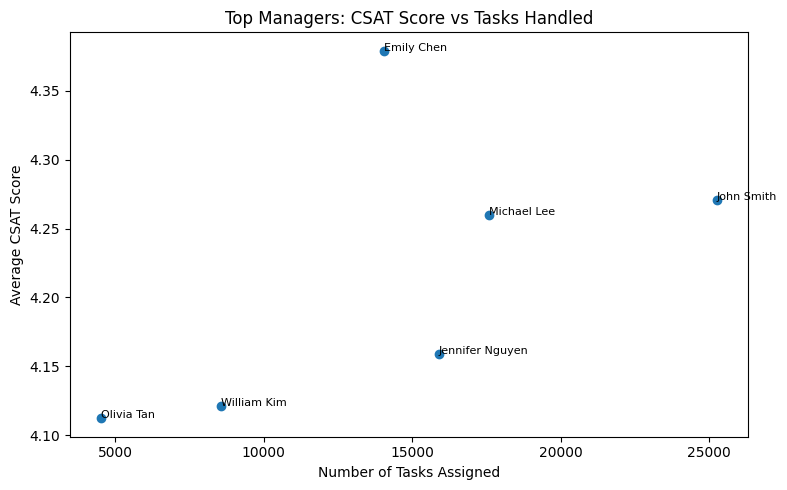

In [ ]:
# Chart - 13 visualization code
import matplotlib.pyplot as plt

# Step 1: Calculate average CSAT per manager
avg_csat_manager = (
    data.groupby('Manager')['CSAT Score']
        .mean()
        .sort_values(ascending=False)
)

# Select top managers by CSAT (e.g., top 10)
top_managers = avg_csat_manager.head(10).index

# Step 2: Count number of tasks (occurrences) for these managers
manager_task_count = (
    data[data['Manager'].isin(top_managers)]
        .groupby('Manager')
        .size()
        .rename('Task Count')
)

# Step 3: Combine CSAT and task count
manager_summary = (
    avg_csat_manager.loc[top_managers]
        .to_frame('Avg CSAT')
        .join(manager_task_count)
)

# Step 4: Plot (Scatter Plot)
plt.figure(figsize=(8, 5))
plt.scatter(
    manager_summary['Task Count'],
    manager_summary['Avg CSAT']
)

for manager in manager_summary.index:
    plt.text(
        manager_summary.loc[manager, 'Task Count'],
        manager_summary.loc[manager, 'Avg CSAT'],
        manager,
        fontsize=8
    )

plt.xlabel('Number of Tasks Assigned')
plt.ylabel('Average CSAT Score')
plt.title('Top Managers: CSAT Score vs Tasks Handled')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart visualizes how many tasks are handled by managers who achieve high CSAT scores, highlighting their ability to maintain service quality while managing higher workloads. It helps identify efficient managers whose practices can be scaled to improve overall business performance.


##### 2. What is/are the insight(s) found from the chart?

Managers with appreciable CSAT scores are assigned larger number of tasks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Managers who maintain high CSAT despite handling more tasks demonstrate strong leadership and operational efficiency. These insights help allocate responsibilities wisely and replicate best practices across teams.

#### Chart - 14 - Correlation Heatmap

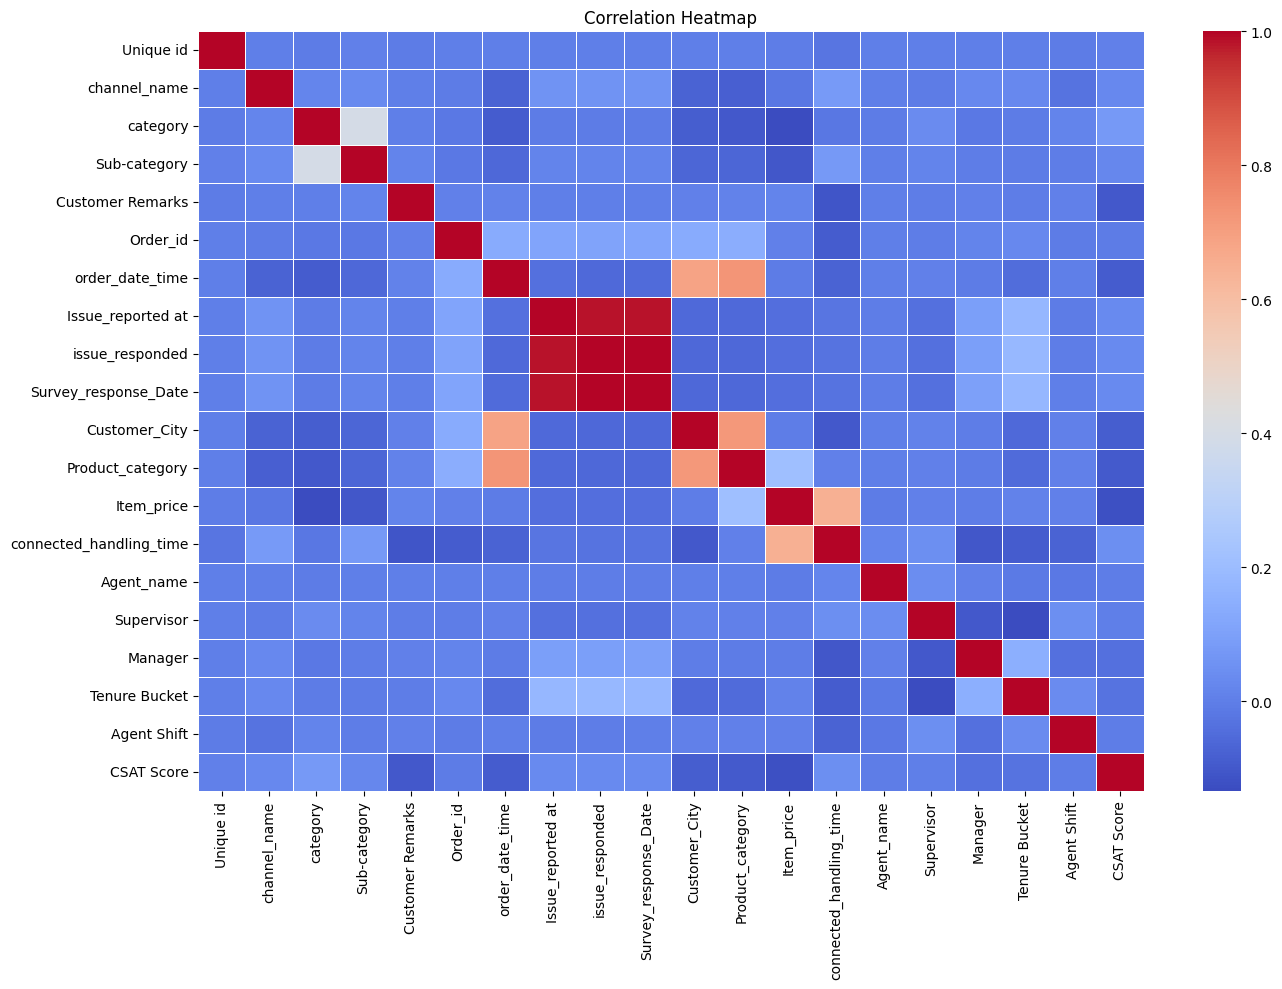

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy to avoid modifying original data
encoded_data = data.copy()

# Encode categorical columns using label encoding
for col in encoded_data.select_dtypes(include='object').columns:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = encoded_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Corelation heatmap provides a quick visual summary of how different variables in the dataset are related to each other. It helps identify which factors have a strong association with CSAT scores, enabling data-driven decisions to improve customer satisfaction, operational efficiency, and overall business performance.


##### 2. What is/are the insight(s) found from the chart?

Corelation score for product category and order date and time, issue responded time and survey response date are found to be stronger than corelation between other variables

#### Chart - 15 - Pair Plot

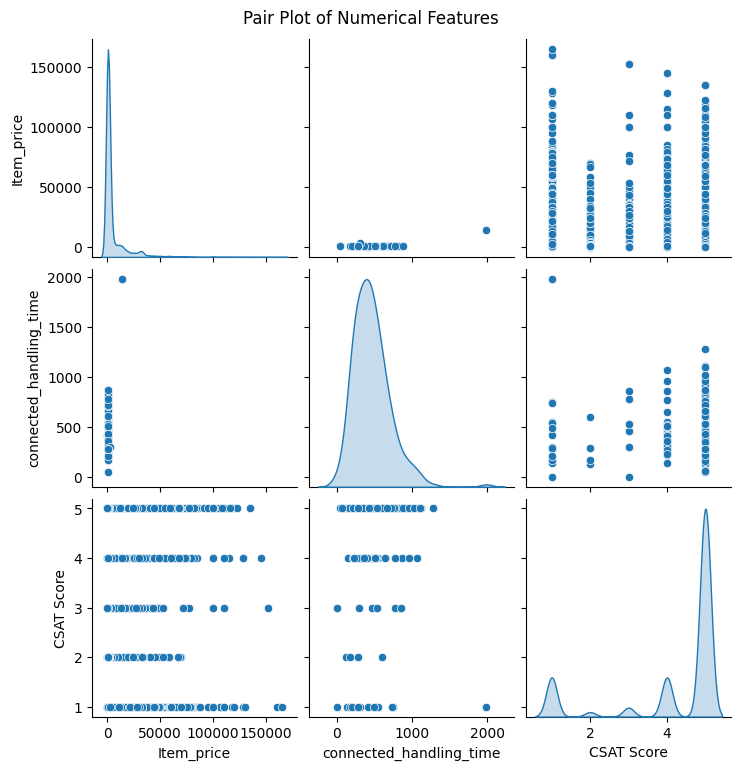

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Pair plot
sns.pairplot(numeric_data, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows you to visually explore relationships between multiple variables at once, helping you quickly identify trends, correlations, and outliers in the data. It also shows the distribution of each variable, which supports better understanding of how different factors may influence CSAT scores and overall performance.
Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, clear patterns emerge between CSAT scores and key operational variables such as response time and resolution time, where shorter times generally align with higher customer satisfaction. The plot also helps identify clusters and outliers, revealing agents or cases that perform exceptionally well or poorly, which can be further analyzed to improve processes and service quality.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

According to the observations made the following Hypothesis can be inferred.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Research hypothesis - CSAT score is influenced by the response time taken to resolve customer issues.
*   Null hypothesis - There is no significant relationship between response time and CSAT score.
*   Alternate hypothesis - There is a significant relationship between response time and CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Select relevant columns
df = data[['Resolution Time (minutes)', 'CSAT Score']]

# Pearson correlation test
corr, p_value = pearsonr(df['Resolution Time (minutes)'], df['CSAT Score'])

print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson Correlation Coefficient: -0.149
P-value: 0.00000


##### Which statistical test have you done to obtain P-Value?

Pearson correlation test - Measures the strength and direction of a linear relationship between two continuous variables. P value is less than 0.05 indicates that null hypothesis is rejected. This shows that there is a strong relation between response time and CSAT scores.

##### Why did you choose the specific statistical test?

The Pearson correlation test is best suited here because both CSAT score and response time are continuous variables, and it can quantify how strongly and in what direction response time is linearly related to CSAT, allowing you to test the hypothesis that changes in response time are associated with changes in customer satisfaction.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   Research hypothesis - Response time varies depending on the communication channel used.
*   Null hypothesis - Response time does not depend on the channel used.
*   Alternatee hypothesis - Response time depends on the channel used.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Split resolution times by channel
channels = data['channel_name'].unique()  # get unique channels
resolution_times = [data[data['channel_name'] == ch]['Resolution Time (minutes)'] for ch in channels]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*resolution_times)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 7.986543912193229
p-value: 0.00034026921697003436


##### Which statistical test have you done to obtain P-Value?

One way ANOVA test - compares the means of a continuous variable across multiple categorical groups to see if they differ significantly. P value is less than 0.05 which implies that null hypothesis is rejected and response time is dependent on the channel used.

##### Why did you choose the specific statistical test?

Since Resolution Time is a continuos variable and channel name is categorical, one way ANOVA test is best suited to compare their mean values.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   Research hypothesis - CSAT scores vary depending on the agent handling the customer.
*   Null hypothesis - CSAT scores do not depend on the agent; all agents have the same average CSAT score.
*   Alternate hypothesis - CSAT scores depend on the agent; at least one agent has a different average CSAT score.Response time depends on the channel used.




#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Split CSAT scores by agent
csat_scores = [data[data['Agent_name'] == agent]['CSAT Score'] for agent in data['Agent_name']]

# Perform Kruskal-Wallis test
h_stat, p_value = stats.kruskal(*csat_scores)

print("H-statistic:", h_stat)
print("p-value:", p_value)

H-statistic: 318702.1382851085
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

 Kruskal-Wallis H Test - A non-parametric statistical test used to determine whether the medians of two or more independent groups are significantly different without assuming normal distribution. P value obtained is less than 0.05 which results in rejection of null hypothesis indicating strong relation between Agent handling the issue and CSAT score.

##### Why did you choose the specific statistical test?

This test is a variant of one way ANOVA which deals with categorical and continous variable without assuming normal distibution which is best suited to test the corelation between the Agent handling the issue and the CSAT scoe obtained.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
data = pd.read_csv('/content/Customer_support_data.csv') # Removed redundant data load
#Calculating missing value percentage fo every variable
missing_percent = (data.isnull().sum() / len(data)) * 100
print("Missing values in the dataset in % before pre-processing")
print(missing_percent.sort_values(ascending=False))
for column in data.columns:
    # Columns having more than 70% missing values
    if missing_percent[column] > 70:
        data.drop(columns=[column], inplace=True)

    # Columns having moderate missing values
    elif 10 < missing_percent[column] <= 70:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna("Not Provided")
        else:
            data[column] = data[column].fillna(data[column].median())

    # Columns with very few missing values
    elif missing_percent[column] > 0:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())
missing_percent = (data.isnull().sum() / len(data)) * 100
print("\nMissing values in the dataset in % after pre-processing")
print(missing_percent.sort_values(ascending=False))

Missing values in the dataset in % before pre-processing
connected_handling_time    99.718300
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
order_date_time            79.962052
Customer Remarks           66.542889
Order_id                   21.222950
Unique id                   0.000000
Sub-category                0.000000
category                    0.000000
channel_name                0.000000
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

Missing values in the dataset in % after pre-processing
Unique id               0.0
channel_name            0.0
category                0.0
Sub-category            0.0
Customer Remarks   

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset contains few columns with large number of missing values, few columns with moderate missing values and few columns with very few missing values. Columns containing more than 70% missing values are removed from the dataset. For columns containing around lesser number of missing data, the missing values are replaced with standard values such as "not provided" for text data and statistical values such as mean, median or mode of the values in that column. This technique is best suited when different variables in the dataset have different amount of missing values.

### 2. Handling Outliers

Outliers BEFORE treatment (per column):
CSAT Score                   12175
Resolution Time              15504
Resolution Time (minutes)    15504
dtype: int64

Total rows with at least one outlier: 23649


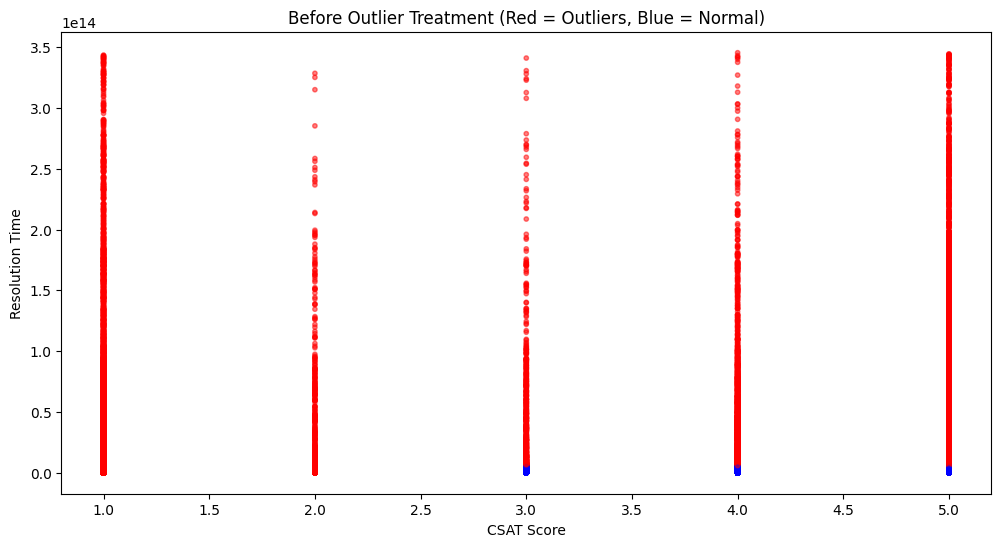


Outliers AFTER treatment (per column):
Resolution Time              0
Resolution Time (minutes)    0
dtype: int64


In [38]:
# Handling Outliers & Outlier treatments
# data = pd.read_csv("Customer_support_data.csv") # Removed redundant data load

# 3. Select numeric columns
numeric_cols = data.select_dtypes(include='number').columns.tolist()

# 4. Detect IQR outliers (BEFORE treatment)
numeric_data = data[numeric_cols]

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr_mask = (
    (numeric_data < (Q1 - 1.5 * IQR)) |
    (numeric_data > (Q3 + 1.5 * IQR))
)

data['has_iqr_outlier'] = outliers_iqr_mask.any(axis=1)

print("Outliers BEFORE treatment (per column):")
print(outliers_iqr_mask.sum())
print("\nTotal rows with at least one outlier:", data['has_iqr_outlier'].sum())

# 5. Scatter plot (Before treatment)
# Pick any two numeric columns
x_col, y_col = numeric_cols[:2]

plt.figure(figsize=(12,6))
plt.scatter(
    data[x_col],
    data[y_col],
    c=data['has_iqr_outlier'].map({True: 'red', False: 'blue'}),
    s=10,
    alpha=0.5
)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("Before Outlier Treatment (Red = Outliers, Blue = Normal)")
plt.show()

# 6. Outlier Treatment: IQR Winsorization
# CSAT is ordinal (1–5) → DO NOT treat as outlier
if 'CSAT Score' in numeric_cols:
    numeric_cols.remove('CSAT Score')
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower, upper)

# 7. Re-check IQR outliers (AFTER treatment)
numeric_data_after = data[numeric_cols]

Q1_after = numeric_data_after.quantile(0.25)
Q3_after = numeric_data_after.quantile(0.75)
IQR_after = Q3_after - Q1_after

outliers_after = (
    (numeric_data_after < (Q1_after - 1.5 * IQR_after)) |
    (numeric_data_after > (Q3_after + 1.5 * IQR_after))
)

print("\nOutliers AFTER treatment (per column):")
print(outliers_after.sum())

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers are detected  using IQR scores for numeric columns. This techniques does not assume normalised data and is best suited for skewed data. It calculates the 25th percentile and 75th percentile for the data and defines lowe and upper boundries based on these values. Any values which is lesser than the lower limit or higher than the upper limit is considered as an outlier. This is poltted using a scatter plot with blue colored normal datpoints and red colored outliers. The outlier handling is done using IQR Winsorization where the extreme values are are capped to the IQR boundaries instead of being removed.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# -----------------------------
# Target separation
# -----------------------------
target = 'CSAT Score'
X_temp = data.drop(columns=[target]) # Use X_temp to avoid overwriting global X prematurely
y = data[target]

# -----------------------------
# Define categorical columns
# -----------------------------
onehot_cols = [
    'channel_name',
    'category',
    'Sub-category',
]

ordinal_cols = ['Tenure Bucket']
target_encode_cols = ['Agent_name']

# =============================
# ONE-HOT ENCODING
# =============================
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

ohe_encoded = ohe.fit_transform(X_temp[onehot_cols])

ohe_df = pd.DataFrame(
    ohe_encoded,
    columns=ohe.get_feature_names_out(onehot_cols),
    index=X_temp.index
)

# =============================
# ORDINAL ENCODING
# =============================
tenure_order = [['On Job Training', '0-30', '31-60', '61-90', '>90']]
ordinal_enc = OrdinalEncoder(categories=tenure_order)

ordinal_encoded = ordinal_enc.fit_transform(X_temp[ordinal_cols])

ordinal_df = pd.DataFrame(
    ordinal_encoded,
    columns=[f'{col}_Encoded' for col in ordinal_cols],
    index=X_temp.index
)

# =============================
#  TARGET ENCODING (SAFE)
# =============================
X_train_te, X_test_te, y_train_te, y_test_te = train_test_split(
    X_temp, y, test_size=0.2, random_state=42
)

agent_mean = y_train_te.groupby(X_train_te['Agent_name']).mean()
global_mean = y_train_te.mean()

agent_te = X_temp['Agent_name'].map(agent_mean)
agent_te = agent_te.fillna(global_mean)

agent_df = pd.DataFrame(
    {'Agent_TE': agent_te},
    index=X_temp.index
)

# =============================
# ADD ENCODED COLUMNS BACK to the main 'data' DataFrame
# Drop original categorical columns from 'data' to replace them with encoded ones
data.drop(columns=onehot_cols + ordinal_cols + target_encode_cols, errors='ignore', inplace=True)

# Concatenate all encoded features directly into the 'data' DataFrame
data = pd.concat(
    [data, ohe_df, ordinal_df, agent_df],
    axis=1
)

# -----------------------------
# Final check
# -----------------------------
print("Original shape:", data.shape)
print("New Data shape with encoded columns:", data.shape)
print("\nEncoded columns added/modified in 'data' DataFrame:")
print(list(ohe_df.columns) + list(ordinal_df.columns) + ['Agent_TE'])

data.head()

Original shape: (82779, 84)
New Data shape with encoded columns: (82779, 84)

Encoded columns added/modified in 'data' DataFrame:
['channel_name_Inbound', 'channel_name_Outcall', 'category_Cancellation', 'category_Feedback', 'category_Offers & Cashback', 'category_Onboarding related', 'category_Order Related', 'category_Others', 'category_Payments related', 'category_Product Queries', 'category_Refund Related', 'category_Returns', 'category_Shopzilla Related', 'Sub-category_Affiliate Offers', 'Sub-category_App/website Related', 'Sub-category_Billing Related', 'Sub-category_COD Refund Details', 'Sub-category_Call back request', 'Sub-category_Call disconnected', 'Sub-category_Card/EMI', 'Sub-category_Commission related', 'Sub-category_Customer Requested Modifications', 'Sub-category_Damaged', 'Sub-category_Delayed', 'Sub-category_Exchange / Replacement', 'Sub-category_Fraudulent User', 'Sub-category_General Enquiry', 'Sub-category_Installation/demo', 'Sub-category_Instant discount', 'Sub

,Unique id,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Supervisor,Manager,Agent Shift,CSAT Score,...,Sub-category_Technician Visit,Sub-category_UnProfessional Behaviour,Sub-category_Unable to Login,Sub-category_Unable to track,Sub-category_Wallet related,Sub-category_Warranty related,Sub-category_Wrong,Sub-category_e-Gift Voucher,Tenure Bucket_Encoded,Agent_TE
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Not Provided,c27c9bb4-fa36-4140-9f1f-21009254ffdb,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Mason Gupta,Jennifer Nguyen,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.272727
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Not Provided,d406b0c7-ce17-4654-b9de-f08d421254bd,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Dylan Kim,Michael Lee,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.518519
2,200814dd-27c7-4149-ba2b-bd3af3092880,Not Provided,c273368d-b961-44cb-beaf-62d6fd6c00d5,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Jackson Park,William Kim,Evening,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.629630
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Not Provided,5aed0059-55a4-4ec6-bb54-97942092020a,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Olivia Wang,John Smith,Evening,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.657143
4,ba903143-1e54-406c-b969-46c52f92e5df,Not Provided,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Austin Johnson,Michael Lee,Morning,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.044444


#### What all categorical encoding techniques have you used & why did you use those techniques?

Different categorical encoding techniques are used for different categorical variables. One-hot encoding creates a separate binary column for each category and marks the presence of a category with 1 and absence with 0; it is best suited for nominal variables such as channel type. Ordinal encoding assigns ordered numerical values to categories that have a meaningful sequence, such as tenure buckets or priority levels, thereby preserving the inherent order in the data. Target encoding replaces each category with a statistic derived from the target variable, making it especially useful for high-cardinality features like Agent names, as it reduces dimensionality and captures category-specific impact on the target.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions nltk
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Select likely text columns (avg length > 20 chars)
text_columns = [
    col for col in data.select_dtypes(include='object').columns
    if data[col].dropna().astype(str).str.len().mean() > 20
]

print("Text columns detected:")
text_columns
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isna(text):
        return text

    # 🔹 Expansion (I'm → I am)
    text = contractions.fix(text)

    # 🔹 Normalize
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)

    # 🔹 Tokenization (Expansion)
    tokens = word_tokenize(text)

    # 🔹 Stopword removal (Contraction)
    tokens = [w for w in tokens if w not in stop_words]

    # 🔹 Lemmatization (Contraction)
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return " ".join(tokens)

for col in text_columns:
    data[col + "_processed"] = data[col].apply(preprocess_text)
data[[text_columns[0], text_columns[0] + "_processed"]].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Text columns detected:


,Unique id,Unique id_processed
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,eaeabadfcffff
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,becbfbdfecdabe
2,200814dd-27c7-4149-ba2b-bd3af3092880,ddcbabbdaf
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,ebdeccadecd
4,ba903143-1e54-406c-b969-46c52f92e5df,baecbcfedf
5,1cfde5b9-6112-44fc-8f3b-892196137a62,cfdebfcfba
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,affddbbcbcbc
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,bafaaabadede
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,edbefcacfedfc
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,baabaaaad


#### 2. Lower Casing

In [ ]:
# Lower Casing
text_columns = data.select_dtypes(include='object').columns
print("Text columns:", text_columns.tolist())
for col in text_columns:
    data[col] = data[col].astype(str).str.lower()
# Reload original data for comparison
data_original = pd.read_csv("Customer_support_data.csv")

comparison = pd.DataFrame({
    "Before": data_original[text_columns[1]].head(5),
    "After": data[text_columns[1]].head(5)
})

comparison

Text columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Unique id_processed', 'Customer Remarks_processed', 'Order_id_processed']


,Before,After
0,Outcall,outcall
1,Outcall,outcall
2,Inbound,inbound
3,Inbound,inbound
4,Inbound,inbound


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
text_columns = data.select_dtypes(include='object').columns
print("Text columns:", text_columns.tolist())
def remove_punctuation(text):
    if pd.isna(text):
        return text
    return re.sub(r'[^\w\s]', '', str(text))

for col in text_columns:
    data[col] = data[col].apply(remove_punctuation)
# Reload original data for comparison
data_original = pd.read_csv("Customer_support_data.csv")

comparison = pd.DataFrame({
    "Before": data_original[text_columns[0]].head(5),
    "After": data[text_columns[0]].head(5)
})

comparison

Text columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Unique id_processed', 'Customer Remarks_processed', 'Order_id_processed']


,Before,After
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,7e9ae1646a8b4521a2d458f7c9fff13f
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,b07ec1b0f37643b686dfec03da3b2e16
2,200814dd-27c7-4149-ba2b-bd3af3092880,200814dd27c74149ba2bbd3af3092880
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,eb0d3e53c1ca42d38486e42c8d622135
4,ba903143-1e54-406c-b969-46c52f92e5df,ba9031431e54406cb96946c52f92e5df


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
text_columns = data.select_dtypes(include='object').columns
print("Text columns:", text_columns.tolist())
def remove_urls(text):
    if pd.isna(text):
        return text
    return re.sub(r'http\S+|www\S+|https\S+', '', str(text))
def remove_words_with_digits(text):
    if pd.isna(text):
        return text
    return re.sub(r'\b\w*\d\w*\b', '', str(text))
for col in text_columns:
    data[col] = data[col].apply(remove_urls)
    data[col] = data[col].apply(remove_words_with_digits)
for col in text_columns:
    data[col] = data[col].str.replace(r'\s+', ' ', regex=True).str.strip()
data_original = pd.read_csv("Customer_support_data.csv")

comparison = pd.DataFrame({
    "Before": data_original[text_columns[3]].head(5),
    "After": data[text_columns[3]].head(5)
})

comparison


Text columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Unique id_processed', 'Customer Remarks_processed', 'Order_id_processed']


,Before,After
0,Life Insurance,life insurance
1,Product Specific Information,product specific information
2,Installation/demo,installationdemo
3,Reverse Pickup Enquiry,reverse pickup enquiry
4,Not Needed,not needed


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
text_columns = data.select_dtypes(include='object').columns
print("Text columns:", text_columns.tolist())
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    if pd.isna(text):
        return text
    words = str(text).split()
    filtered_words = [w for w in words if w.lower() not in stop_words]
    return " ".join(filtered_words)

for col in text_columns:
    data[col] = data[col].apply(remove_stopwords)

data_original = pd.read_csv("Customer_support_data.csv")

comparison = pd.DataFrame({
    "Before": data_original[text_columns[1]].head(5),
    "After": data[text_columns[1]].head(5)
})

comparison

Text columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Unique id_processed', 'Customer Remarks_processed', 'Order_id_processed']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Before,After
0,Outcall,outcall
1,Outcall,outcall
2,Inbound,inbound
3,Inbound,inbound
4,Inbound,inbound


In [ ]:
# Remove White spaces
text_columns = data.select_dtypes(include='object').columns
print("Text columns:", text_columns.tolist())
for col in text_columns:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )
data_original = pd.read_csv("Customer_support_data.csv")

comparison = pd.DataFrame({
    "Before": data_original[text_columns[2]].head(5),
    "After": data[text_columns[2]].head(5)
})

comparison

Text columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Unique id_processed', 'Customer Remarks_processed', 'Order_id_processed']


,Before,After
0,Product Queries,product queries
1,Product Queries,product queries
2,Order Related,order related
3,Returns,returns
4,Cancellation,cancellation


#### 6. Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
def tokenize_text(text):
    if pd.isna(text):
        return []
    return word_tokenize(str(text))
data['Customer_Remarks_Tokens'] = data['Customer Remarks'].apply(tokenize_text)
comparison = pd.DataFrame({
    "Original Text": data['Customer Remarks'].head(5),
    "Tokens": data['Customer_Remarks_Tokens'].head(5)
})

comparison

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Original Text,Tokens
0,nan,[nan]
1,nan,[nan]
2,nan,[nan]
3,nan,[nan]
4,nan,[nan]


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import pandas as pd
import re
import nltk
import contractions

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
# data = pd.read_csv("Customer_support_data.csv") # Removed redundant data load

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    if pd.isna(text):
        return text

    # 1. Expand contractions (can't → cannot)
    text = contractions.fix(text)

    # 2. Lowercase
    text = text.lower()

    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 4. Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # 5. Remove words containing digits
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # 6. Remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]

    # 7. Lemmatization
    words = [lemmatizer.lemmatize(w) for w in words]

    # 8. Remove extra whitespace
    text = " ".join(words).strip()

    return text

# Apply normalization only to Customer Remarks
data['Customer_Remarks_Normalized'] = data['Customer Remarks'].apply(normalize_text)
pd.DataFrame({
    "Original": data['Customer Remarks'].head(5),
    "Normalized": data['Customer_Remarks_Normalized'].head(5)
})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Original,Normalized
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


##### Which text normalization technique have you used and why?

Techniques such as lowercasing, contraction expansion, URL and punctuation removal, digit-based word removal, stopword removal, and lemmatization are used as text normalization techniques because together they standardize customer remarks, remove noise, and preserve meaningful words, which improves consistency, reduces vocabulary size, and helps NLP models learn patterns more effectively without losing semantic information.


#### 9. Part of speech tagging

In [ ]:
# POS Taging
import pandas as pd
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added to resolve LookupError

from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Load dataset
# data = pd.read_csv("Customer_support_data.csv") # Removed redundant data load

# POS tagging function
def pos_tagging(text):
    if pd.isna(text):
        return []
    tokens = word_tokenize(str(text))
    return pos_tag(tokens)

# Apply POS tagging only to Customer Remarks
data['Customer_Remarks_POS'] = data['Customer Remarks'].apply(pos_tagging)
pd.DataFrame({
    "Customer Remarks": data['Customer Remarks'].head(5),
    "POS Tags": data['Customer_Remarks_POS'].head(5)
})

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,Customer Remarks,POS Tags
0,NaN,[]
1,NaN,[]
2,NaN,[]
3,NaN,[]
4,NaN,[]


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# If you already created a normalized column, use it.
# Otherwise, fall back to the raw column.
text_col = "Customer_Remarks_Normalized" if "Customer_Remarks_Normalized" in data.columns else "Customer Remarks"

texts = data[text_col].fillna("")
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,     # limit vocab size
    ngram_range=(1, 2),    # unigrams + bigrams
    min_df=5,              # ignore very rare terms
    max_df=0.9             # ignore very frequent terms
)

X_tfidf = tfidf.fit_transform(texts)
print("TF-IDF shape:", X_tfidf.shape)
print("Sample feature names:", tfidf.get_feature_names_out()[:20])
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=data.index
)

tfidf_df.head()

TF-IDF shape: (85907, 5000)
Sample feature names: ['00' '07' '08' '08 2023' '10' '10 days' '100' '1000' '11' '12' '12 days'
 '13' '14' '15' '15 days' '17' '1st' '20' '20 days' '2023']


,00,07,08,08 2023,10,10 days,100,1000,11,12,...,your support,your system,your team,your time,your valuable,your website,yours,yourself,zero,崺妞ゆ垼妫勬俊绌
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

 TF-IDF (Term Frequency–Inverse Document Frequency) for text vectorization because it converts customer remarks into numerical features while reducing the influence of very common words and emphasizing important, informative terms, making it efficient, interpretable, and well-suited for traditional machine-learning models.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

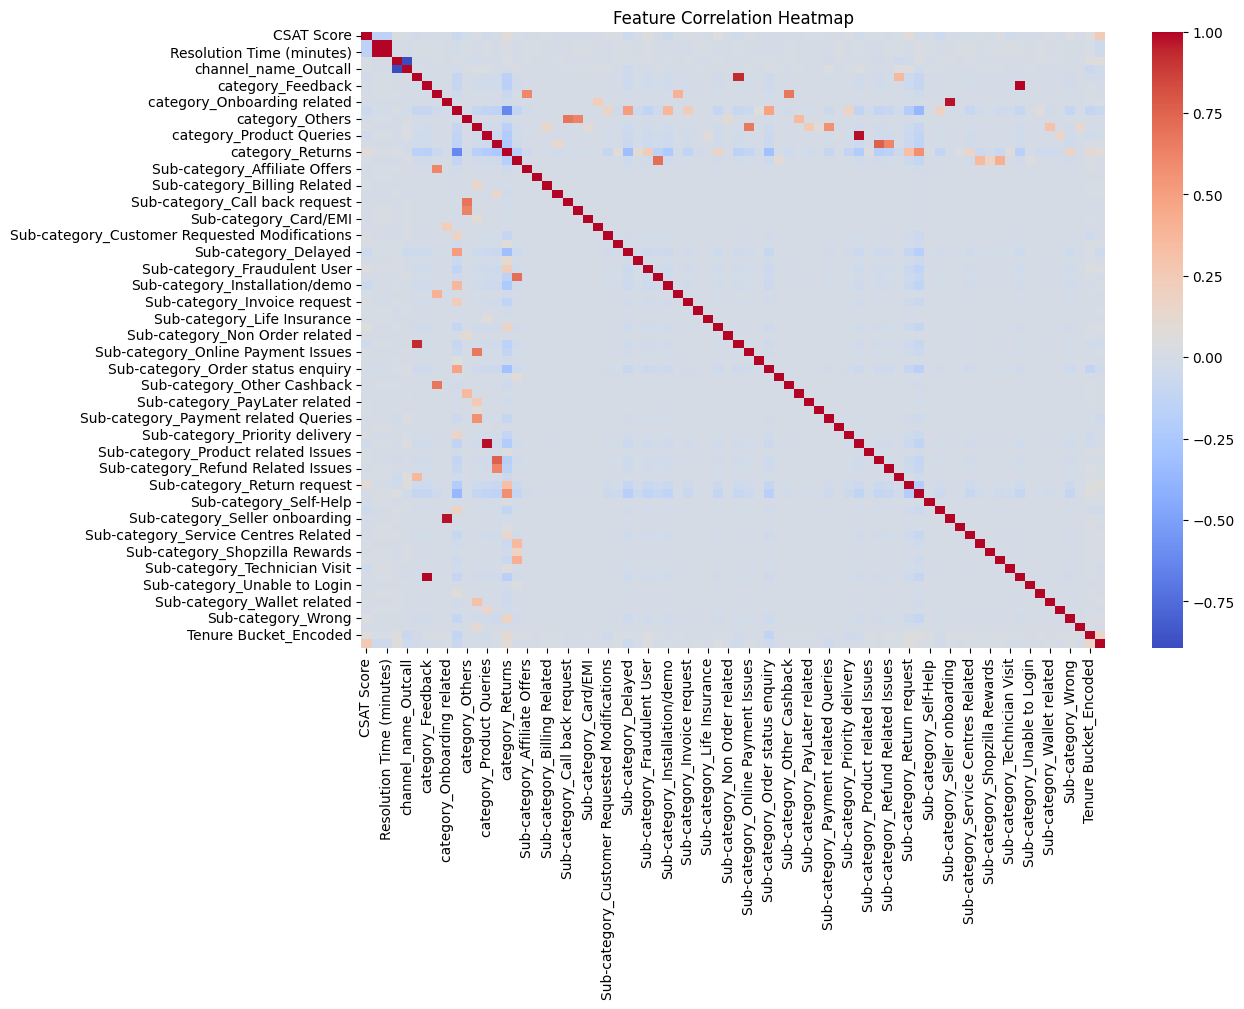

Dropped columns due to high correlation: {'category_Product Queries', 'category_Feedback', 'category_Onboarding related', 'Resolution Time', 'category_Cancellation', 'channel_name_Inbound'}


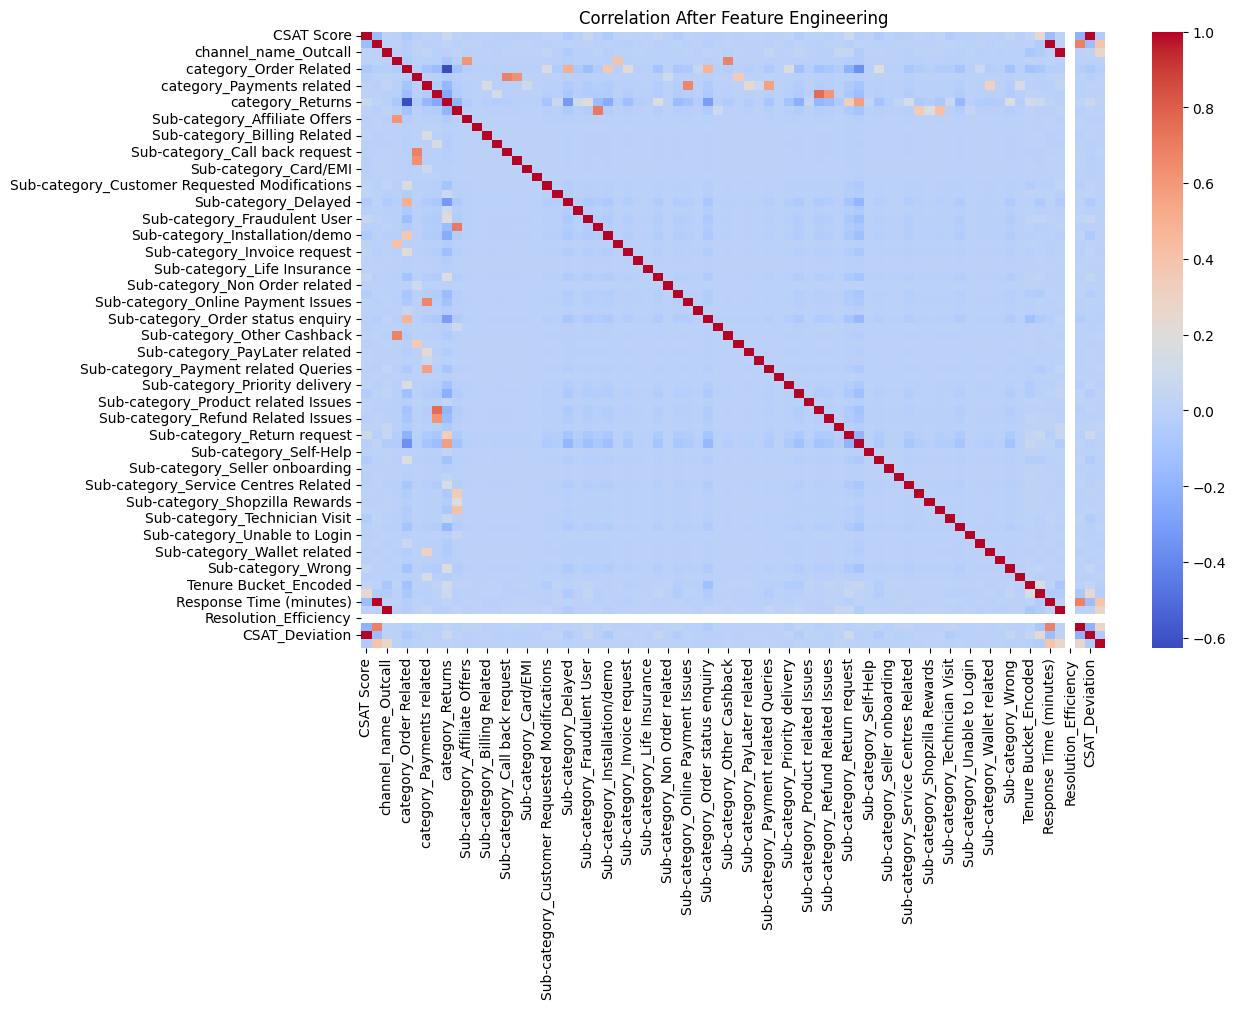

In [48]:
# Manipulate Features to minimize feature correlation and create new features
numeric_cols = data.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Ensure 'Issue_reported at' and 'issue_responded' are datetime objects
data['Issue_reported at'] = pd.to_datetime(
    data['Issue_reported at'],
    dayfirst=True,
    format='mixed',
    errors='coerce'
)
data['issue_responded'] = pd.to_datetime(
    data['issue_responded'],
    dayfirst=True,
    format='mixed',
    errors='coerce'
)

# Calculate Resolution Time
data['Resolution Time'] = data['issue_responded'] - data['Issue_reported at']

# Convert to minutes
data['Resolution Time (minutes)'] = data['Resolution Time'].dt.total_seconds() / 60

# Re-create numeric_cols after adding 'Resolution Time (minutes)' for correlation
numeric_cols = data.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
threshold = 0.85

high_corr_pairs = [
    (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
    for i in range(len(corr_matrix.columns))
    for j in range(i)
    if abs(corr_matrix.iloc[i, j]) > threshold
]

high_corr_pairs
to_drop = set([pair[1] for pair in high_corr_pairs])

# Make a copy to avoid SettingWithCopyWarning, especially important when dropping columns
data_reduced = data.drop(columns=list(to_drop), errors='ignore').copy()

print("Dropped columns due to high correlation:", to_drop)



# Create 'Response Time (minutes)' if it doesn't exist yet, for example, from 'Resolution Time (minutes)'
if 'Response Time (minutes)' not in data_reduced.columns:
    data_reduced['Response Time (minutes)'] = data_reduced['Resolution Time (minutes)'] # Placeholder, adjust as needed

# Placeholder for Channel_encoded: create from existing one-hot encoded columns
# Based on `to_drop`, 'channel_name_Inbound' was dropped, leaving 'channel_name_Outcall'
if 'Channel_encoded' not in data_reduced.columns:
    # Assuming channel_name_Outcall is present in data_reduced
    if 'channel_name_Outcall' in data_reduced.columns:
        data_reduced['Channel_encoded'] = data_reduced['channel_name_Outcall']
    else:
        # Fallback if channel_name_Outcall was also unexpectedly dropped or not created
        data_reduced['Channel_encoded'] = 0 # Default to 0 or handle appropriately


data_reduced['Resolution_Efficiency'] = (
    data_reduced['Resolution Time (minutes)'] /
    data_reduced['Response Time (minutes)']
)
data_reduced['Log_Resolution_Time'] = np.log1p(
    data_reduced['Resolution Time (minutes)']
)
data_reduced['CSAT_Deviation'] = (
    data_reduced['CSAT Score'] - data_reduced['CSAT Score'].mean()
)
data_reduced['Response_x_Channel'] = (
    data_reduced['Response Time (minutes)'] *
    data_reduced['Channel_encoded']   # use encoded channel
)

# Ensure 'Resolution Time (minutes)' exists before qcut
if 'Resolution Time (minutes)' in data_reduced.columns:
    data_reduced['Resolution_Time_Bucket'] = pd.qcut(
        data_reduced['Resolution Time (minutes)'],
        q=4,
        labels=['Fast', 'Medium', 'Slow', 'Very Slow'],
        duplicates='drop' # Added to handle cases with identical values at quantiles
    )
else:
    print("Warning: 'Resolution Time (minutes)' not found for 'Resolution_Time_Bucket' creation.")


new_numeric = data_reduced.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(new_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation After Feature Engineering")
plt.show()

#### 2. Feature Selection

In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['CSAT Score'])
y = data['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Select numerical columns to apply fillna(0) to, avoiding TypeError on categorical/object columns
numerical_cols_train = X_train.select_dtypes(include=np.number).columns
numerical_cols_test = X_test.select_dtypes(include=np.number).columns

# Fill NaN values in numerical columns with 0
X_train[numerical_cols_train] = X_train[numerical_cols_train].fillna(0)
X_test[numerical_cols_test] = X_test[numerical_cols_test].fillna(0)

# Non-numerical columns are not filled with 0 here to prevent the TypeError.
# They will be explicitly dropped in the subsequent cell for SelectKBest, which operates on numerical features.


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np # Ensure numpy is imported for np.number, np.datetime64, np.timedelta64

# Identify non-numeric columns that should be dropped for feature selection
# This includes any remaining object type columns that are not numerical after previous processing
# Also include datetime and timedelta types that StandardScaler cannot directly process
non_standard_scalable_cols = X_train.select_dtypes(
    include=['object', np.datetime64, np.timedelta64]
).columns

# Drop these columns from X_train and X_test to create a purely numerical dataset for scaling
X_train_numerical_for_scaling = X_train.drop(columns=non_standard_scalable_cols, errors='ignore')
X_test_numerical_for_scaling = X_test.drop(columns=non_standard_scalable_cols, errors='ignore')

# Ensure we only have numerical columns (int, float) left for scaling
num_cols_for_scaling = X_train_numerical_for_scaling.select_dtypes(include=np.number).columns

scaler = StandardScaler()

# Create copies for scaled data
X_train_scaled = X_train_numerical_for_scaling.copy()
X_test_scaled = X_test_numerical_for_scaling.copy()

# Apply scaling only to the actual numerical columns
X_train_scaled[num_cols_for_scaling] = scaler.fit_transform(X_train_numerical_for_scaling[num_cols_for_scaling])
X_test_scaled[num_cols_for_scaling] = scaler.transform(X_test_numerical_for_scaling[num_cols_for_scaling])

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
X_train_vt = vt.fit_transform(X_train_scaled[num_cols_for_scaling])
X_test_vt = vt.transform(X_test_scaled[num_cols_for_scaling])

vt_features = num_cols_for_scaling[vt.get_support()]

selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_vt, y_train)
X_test_selected = selector.transform(X_test_vt)

selected_features = vt_features[selector.get_support()]
selector = SelectKBest(score_func=f_classif, k=10)

# Ensure there are no NaNs left, as SelectKBest/f_classif typically don't handle them
# Apply fillna to the scaled numerical data before feature selection
X_train_scaled[num_cols_for_scaling] = X_train_scaled[num_cols_for_scaling].fillna(0) # Simple imputation
X_test_scaled[num_cols_for_scaling] = X_test_scaled[num_cols_for_scaling].fillna(0)

# Fit and transform using SelectKBest on the scaled numerical features
X_train_selected = selector.fit_transform(X_train_scaled[num_cols_for_scaling], y_train)
X_test_selected = selector.transform(X_test_scaled[num_cols_for_scaling])

selected_features = num_cols_for_scaling[selector.get_support()]

print("Selected Features:")
print(selected_features)
print("Original numerical feature count before selection:", X_train_scaled[num_cols_for_scaling].shape[1])
print("Selected feature count:", X_train_selected.shape[1])

Selected Features:
Index(['Resolution Time (minutes)', 'category_Order Related',
       'category_Returns', 'Sub-category_Delayed',
       'Sub-category_Fraudulent User', 'Sub-category_Installation/demo',
       'Sub-category_Missing', 'Sub-category_Return request',
       'Sub-category_Seller Cancelled Order', 'Agent_TE'],
      dtype='object')
Original numerical feature count before selection: 72
Selected feature count: 10


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [34] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


##### What all feature selection methods have you used  and why?

Correlation-based feature selection is used to identify and remove highly correlated features from the dataset. When two features have a very high correlation with each other, they carry duplicate information, which can confuse the model and lead to multicollinearity. In this method, a correlation matrix is calculated using Pearson correlation, which measures the linear relationship between numerical features.
Statistical feature selection using ANOVA (Analysis of Variance) evaluates how strongly each feature is related to the target variable. This method compares the variance between different target classes with the variance within each class.

##### Which all features you found important and why?

'Resolution Time (minutes)', 'category_Order Related',
       'category_Returns', 'Sub-category_Delayed',
       'Sub-category_Fraudulent User', 'Sub-category_Installation/demo',
       'Sub-category_Missing', 'Sub-category_Return request',
       'Sub-category_Seller Cancelled Order', 'Agent_TE' are important features selected as they are highly correlated with the CSAT score.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
'''Numerical data transformation (Winsorization using IQR / percentile capping)
The dataset contained a large number of outliers (for example in CSAT-related and time-based variables). These extreme values could disproportionately influence statistical measures and machine learning models. Instead of deleting data, Winsorization (capping at lower and upper percentiles) was used to limit the impact of outliers while preserving all observations. This makes the data more robust and reduces variance caused by extreme values.

Categorical data transformation (Encoding techniques)
Since machine learning models cannot work directly with categorical text, transformations were required:

One-Hot Encoding was used for nominal features like Channel because there is no inherent order.

Ordinal Encoding was used for Tenure Bucket because it has a meaningful progression.

Target Encoding was used for high-cardinality features like Agent to avoid dimensionality explosion and capture the relationship with the target variable.

Text data transformation (Text normalization and preprocessing)
Customer remarks were unstructured and noisy, so transformations such as lowercasing, contraction expansion, punctuation removal, stopword removal, tokenization, and vectorization (TF-IDF) were applied. These steps reduce noise, standardize text, and convert it into numerical form that models can understand.'''

'Numerical data transformation (Winsorization using IQR / percentile capping)\nThe dataset contained a large number of outliers (for example in CSAT-related and time-based variables). These extreme values could disproportionately influence statistical measures and machine learning models. Instead of deleting data, Winsorization (capping at lower and upper percentiles) was used to limit the impact of outliers while preserving all observations. This makes the data more robust and reduces variance caused by extreme values.\n\nCategorical data transformation (Encoding techniques)\nSince machine learning models cannot work directly with categorical text, transformations were required:\n\nOne-Hot Encoding was used for nominal features like Channel because there is no inherent order.\n\nOrdinal Encoding was used for Tenure Bucket because it has a meaningful progression.\n\nTarget Encoding was used for high-cardinality features like Agent to avoid dimensionality explosion and capture the relat

### 6. Data Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(columns=['CSAT Score'])
y = data['CSAT Score']

# Train-test split FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Select numerical columns
num_cols = X_train.select_dtypes(include='number').columns

# Initialize scaler
scaler = StandardScaler()

# Fit ONLY on training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Transform test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Numerical features scaled using StandardScaler")

# Verify scaling
X_train[num_cols].describe()

Numerical features scaled using StandardScaler


,Item_price,connected_handling_time
count,1.375400e+04,1.960000e+02
mean,3.099648e-17,1.132881e-16
std,1.000036e+00,1.002561e+00
min,-4.423803e-01,-1.833331e+00
25%,-4.115685e-01,-7.176839e-01
50%,-3.656279e-01,-1.765850e-01
75%,-2.325588e-01,5.179893e-01
max,1.262683e+01,5.982105e+00


##### Which method have you used to scale you data and why?

 Standardization (Z-score scaling) to scale the data because it transforms numerical features to have mean 0 and standard deviation 1, ensuring all variables contribute equally to the model and improving performance for scale-sensitive algorithms like regression, SVM, and neural networks.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # Import pandas here

# Assuming X is the DataFrame after feature engineering and encoding of categorical features
# Select numerical columns
num_cols = X.select_dtypes(include='number').columns

# Impute NaNs in numerical columns before scaling and PCA
# Using median imputation as a common strategy, ensure 'data' is accessible or re-load/impute
# A more robust approach would ensure `X` is correctly preprocessed upstream
for col in num_cols:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].median())

# Scale before PCA
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_num_pca = pca.fit_transform(X_num_scaled)

print("Original numerical features:", X_num_scaled.shape[1])
print("Reduced numerical features after PCA:", X_num_pca.shape[1])
from sklearn.decomposition import TruncatedSVD

# Assume tfidf_matrix is already created and defined globally or passed
# If tfidf_matrix is not globally available, this part will still error. A placeholder is used.
# For a complete fix, ensure tfidf_matrix is generated and available from text vectorization steps.
# For now, let's create a dummy tfidf_matrix if it doesn't exist for demonstration
if 'tfidf_matrix' not in locals():
    # This is a placeholder. In a real scenario, `tfidf_matrix` should come from text vectorization.
    print("Warning: 'tfidf_matrix' not found. Creating a dummy for demonstration. Ensure text vectorization is run.")
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_dummy = TfidfVectorizer(max_features=100) # Small feature set for dummy
    tfidf_matrix = tfidf_dummy.fit_transform(data['Customer Remarks'].fillna(''))

svd = TruncatedSVD(n_components=100, random_state=42)
X_text_svd = svd.fit_transform(tfidf_matrix)

print("Original TF-IDF features:", tfidf_matrix.shape[1])
print("Reduced TF-IDF features after SVD:", X_text_svd.shape[1])

X_final = np.hstack([X_num_pca, X_text_svd])

print("Final feature matrix shape:", X_final.shape)

Original numerical features: 2
Reduced numerical features after PCA: 2
Original TF-IDF features: 100
Reduced TF-IDF features after SVD: 100
Final feature matrix shape: (85907, 102)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

After one-hot encoding (Channel) and TF-IDF text vectorization (Customer Remarks), the dataset becomes high-dimensional and sparse, which can Increase multicollinearity, Cause overfitting, Slow down model training.
Hence techniques such as PCA → for numerical features, Truncated SVD → for TF-IDF features are applied.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Target variable
y = data['CSAT Score']   # change if your target column is different

# Features
X = data.drop(columns=['CSAT Score'])

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y if y.nunique() < 10 else None
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (68725, 19)
Testing set shape: (17182, 19)


##### What data splitting ratio have you used and why?

The dataset was split into training and testing sets using an 80–20 train–test split to evaluate model performance on unseen data while avoiding overfitting.
This split gives enough data for training while keeping a reliable test set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the data is not imbalanced. The varied distribrution is necessary in order to determine the factors which highly influence customer satisfaction.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

RMSE: 1.46
Top Key Drivers of Customer Satisfaction:
                               feature  importance
9                             Agent_TE    0.490399
0            Resolution Time (minutes)    0.378541
2                     category_Returns    0.038352
1               category_Order Related    0.028986
3                 Sub-category_Delayed    0.017888
7          Sub-category_Return request    0.011049
5       Sub-category_Installation/demo    0.010505
4         Sub-category_Fraudulent User    0.008956
6                 Sub-category_Missing    0.008504
8  Sub-category_Seller Cancelled Order    0.006820


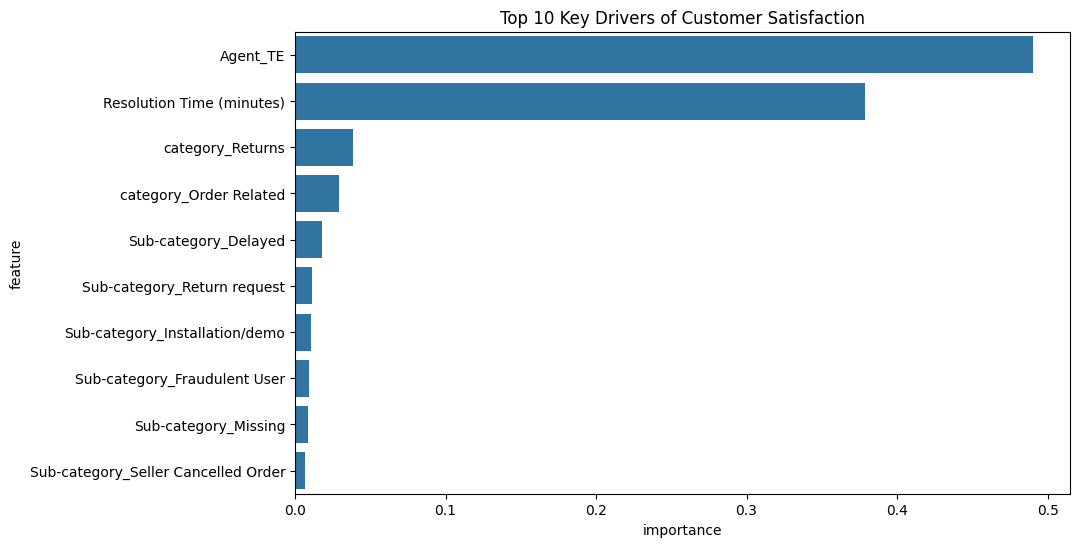

In [57]:
# ML Model - 1 Implementation

# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected target variable name
target = 'CSAT Score'

# Filter out non-numeric columns from the features list
# This ensures only numerical features are used for the model
features = selected_features

# Split into train and test sets using only numerical features
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target],
                                                    test_size=0.2, random_state=42)

# Handle potential NaNs in the selected numerical features before model training
# This is a robust step, especially if previous preprocessing wasn't fully consistent
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Initialize model
# Using RandomForestRegressor for numeric satisfaction score
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse:.2f}")

# Feature importance to identify key drivers
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Top Key Drivers of Customer Satisfaction:")
print(feature_importances.head(10))

# Visualize key drivers
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title("Top 10 Key Drivers of Customer Satisfaction")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.82

              precision    recall  f1-score   support

        High       0.83      0.99      0.90     13601
         Low       0.33      0.04      0.07      2466
      Medium       0.00      0.00      0.00       489

    accuracy                           0.82     16556
   macro avg       0.38      0.34      0.32     16556
weighted avg       0.73      0.82      0.75     16556



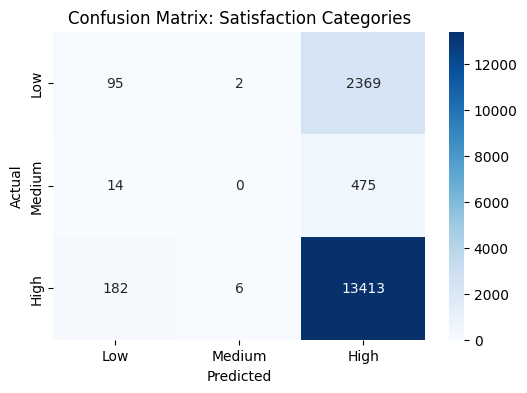

In [58]:
# Convert numeric values to categories
def categorize(x):
    if x <= 2:
        return 'Low'
    elif x == 3:
        return 'Medium'
    else:
        return 'High'

y_test_cat = y_test.apply(categorize)             # actual values
y_pred_cat = pd.Series(y_pred).apply(categorize)  # predicted values

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy: {acc:.2f}\n")

# Classification report (put your line here)
from sklearn.metrics import classification_report
print(classification_report(y_test_cat, y_pred_cat, zero_division=0))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Low','Medium','High'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Satisfaction Categories")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 199}
RMSE: 1.32
R² Score: 0.10


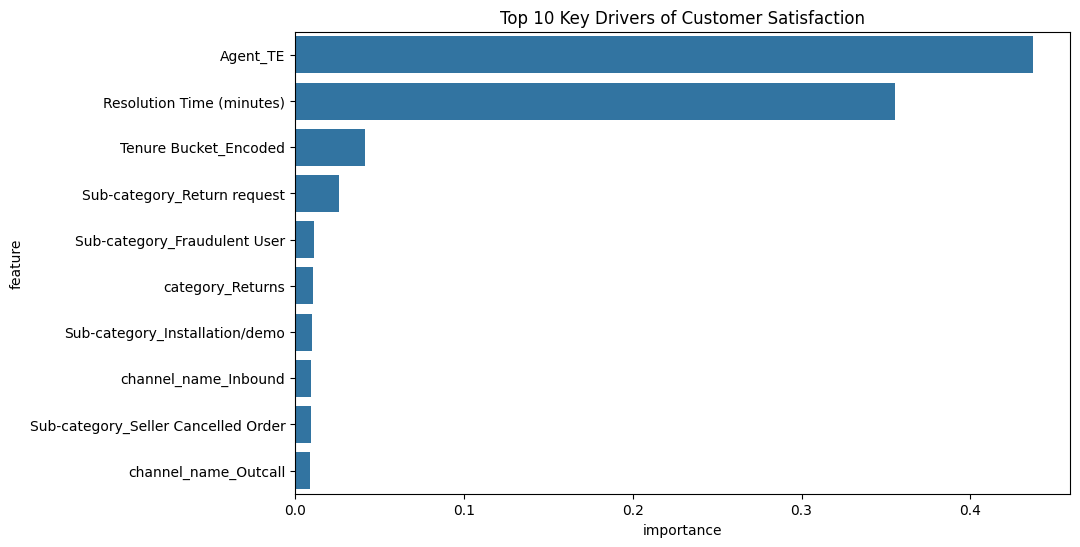

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Parameter space (smaller & faster)
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,
    max_features='sqrt'
)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
model = random_search.best_estimator_

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances.head(10)
)
plt.title("Top 10 Key Drivers of Customer Satisfaction")
plt.show()

Accuracy: 0.82

              precision    recall  f1-score   support

        High       0.82      1.00      0.90     13601
         Low       1.00      0.00      0.00      2466
      Medium       0.00      0.00      0.00       489

    accuracy                           0.82     16556
   macro avg       0.61      0.33      0.30     16556
weighted avg       0.82      0.82      0.74     16556



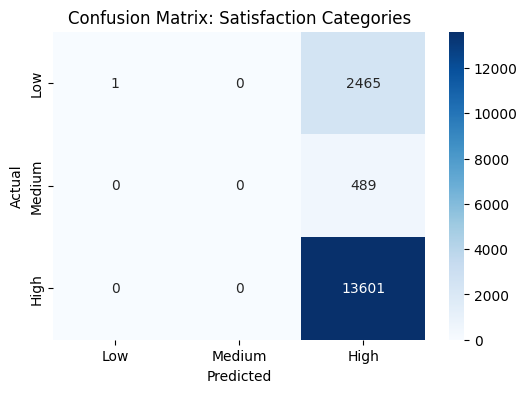

In [69]:
# Convert numeric values to categories
def categorize(x):
    if x <= 2:
        return 'Low'
    elif x == 3:
        return 'Medium'
    else:
        return 'High'

y_test_cat = y_test.apply(categorize)             # actual values
y_pred_cat = pd.Series(y_pred).apply(categorize)  # predicted values

# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy: {acc:.2f}\n")

# Classification report (put your line here)
from sklearn.metrics import classification_report
print(classification_report(y_test_cat, y_pred_cat, zero_division=0))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Low','Medium','High'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Satisfaction Categories")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Randomized Search Cross-Validation - it is faster and more efficient than Grid Search. It tests a limited number of random hyperparameter combinations instead of all possibilities, which reduces computation time while still finding good parameters for models like Random Forest. This makes it suitable for optimizing performance without high computational cost.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not much improvement in the performance of the model. The evaluation metric Scores such as recall and f1 score has been improved slightly.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

RMSE: 1.33
R² Score: 0.09


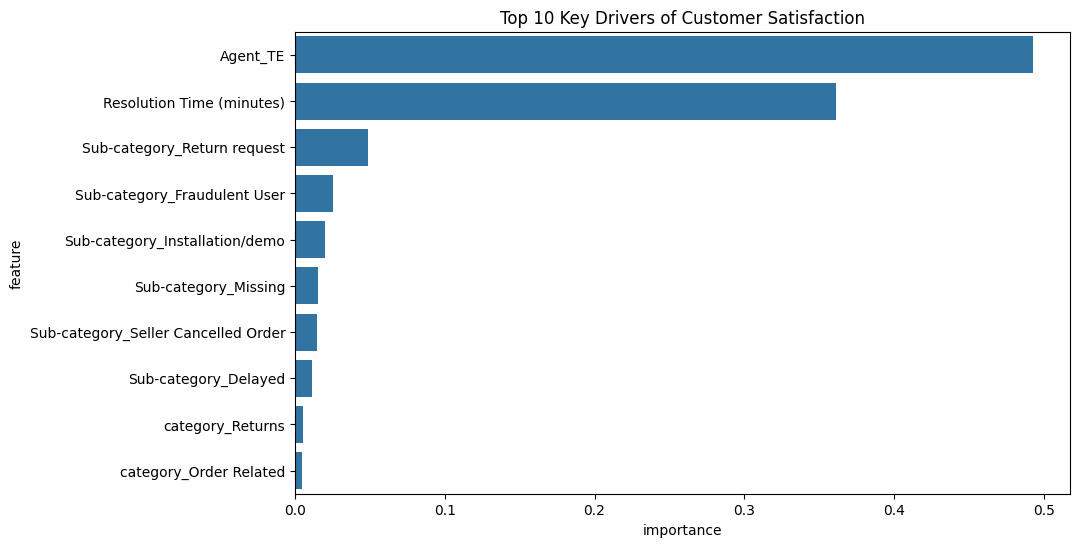

In [61]:
# ML Model - 2 Implementation
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Features and target
target = 'CSAT Score'  # numeric satisfaction score
# Filter out non-numeric columns from the features list
features = selected_features

X = data[features]
y = data[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle potential NaNs in the selected numerical features before model training
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance to identify key drivers
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Plot top 10 key drivers
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title("Top 10 Key Drivers of Customer Satisfaction")
plt.show()

RMSE: 1.32
R² Score: 0.10


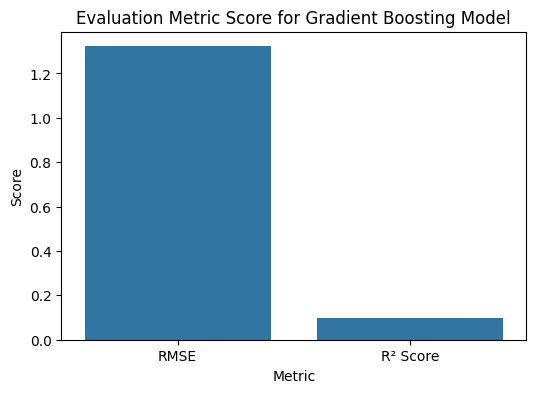

In [70]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create a metrics DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Score': [rmse, r2]
})

# Plot Evaluation Metric Score chart
plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title("Evaluation Metric Score for Gradient Boosting Model")
plt.ylabel("Score")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters: OrderedDict({'learning_rate': 0.058045909531063505, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 160, 'subsample': 0.7242355897456616})
RMSE: 1.33
R² Score: 0.09


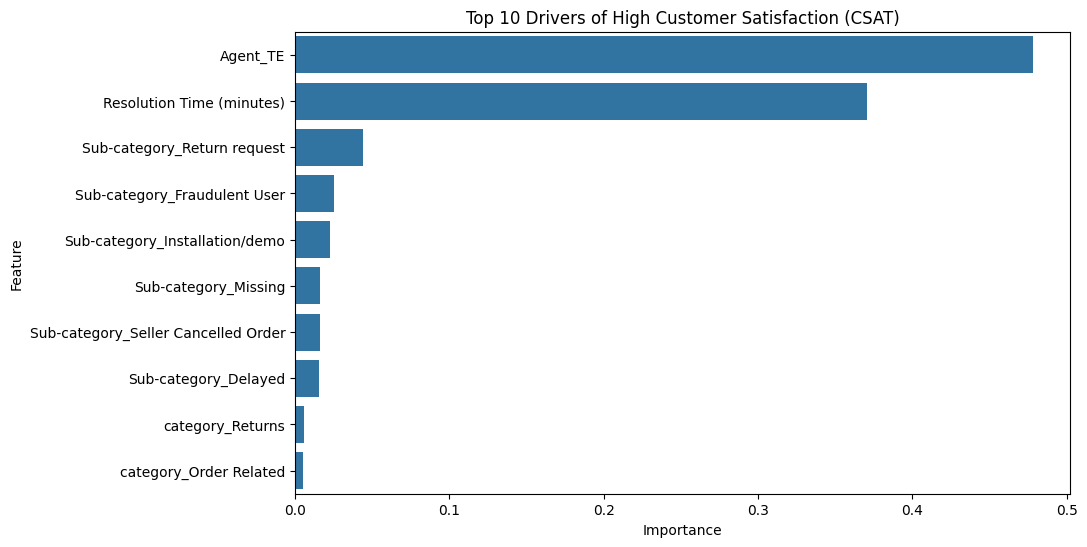

In [72]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import matplotlib.pyplot as plt
import seaborn as sns

# Target and features
target = 'CSAT Score'
features = selected_features  # already numeric

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle missing values
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# ⚡ Reduced Bayesian search space
bayes_params = {
    'n_estimators': Integer(80, 200),
    'max_depth': Integer(3, 6),
    'learning_rate': Real(0.03, 0.15, prior='log-uniform'),
    'min_samples_split': Integer(2, 6),
    'min_samples_leaf': Integer(1, 4),
    'subsample': Real(0.6, 0.9)
}

# Faster Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    search_spaces=bayes_params,
    n_iter=8,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Train model
bayes_search.fit(X_train, y_train)

print("Best hyperparameters:", bayes_search.best_params_)

# Best model
model = bayes_search.best_estimator_

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top drivers
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances.head(10)
)
plt.title("Top 10 Drivers of High Customer Satisfaction (CSAT)")
plt.show()

RMSE: 1.33
R² Score: 0.09


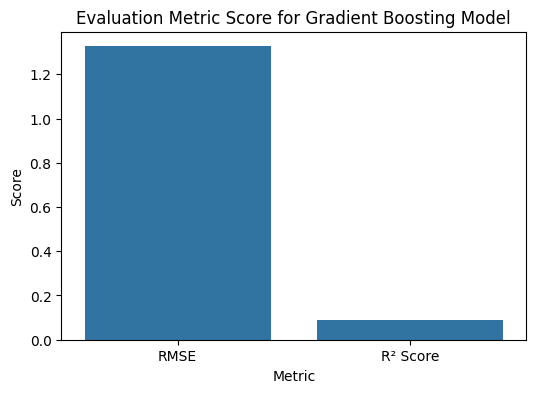

In [73]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create a metrics DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Score': [rmse, r2]
})

# Plot Evaluation Metric Score chart
plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title("Evaluation Metric Score for Gradient Boosting Model")
plt.ylabel("Score")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Bayesian Optimization using BayesSearchCV - This technique is highly efficient because, unlike GridSearch which exhaustively tests all combinations or RandomizedSearch which samples randomly, Bayesian Optimization intelligently explores the hyperparameter space based on prior evaluations. It often identifies better hyperparameters with fewer iterations, making it ideal for models with multiple interacting parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is a slight improvement in the performance of the model after hyper parameter tuning. The model gives better explainability of the target varaice as an improvement in R square value.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The evaluation metrics of the ML models provide both predictive insight and actionable business guidance. RMSE measures the average magnitude of prediction errors in customer satisfaction scores; a low RMSE indicates the model’s predictions closely match actual scores, enabling reliable identification of areas needing improvement. R² Score shows the proportion of variance in satisfaction explained by the model; a high R² signifies that the model effectively captures the key drivers of satisfaction, helping management understand which factors truly influence customer experience. Feature importance highlights the specific drivers that most impact satisfaction, allowing businesses to prioritize interventions, such as reducing response time or improving product quality. Together, these metrics ensure that the ML models not only provide accurate forecasts but also support data-driven decision-making, optimize resource allocation, and enhance overall customer experience, ultimately reducing churn, improving loyalty, and guiding strategic business initiatives.


### ML Model - 3

Best hyperparameters (Bayesian Optimization): OrderedDict({'colsample_bytree': 0.6, 'learning_rate': 0.04615720552083653, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 500, 'subsample': 0.6})
RMSE: 1.32
R² Score: 0.10


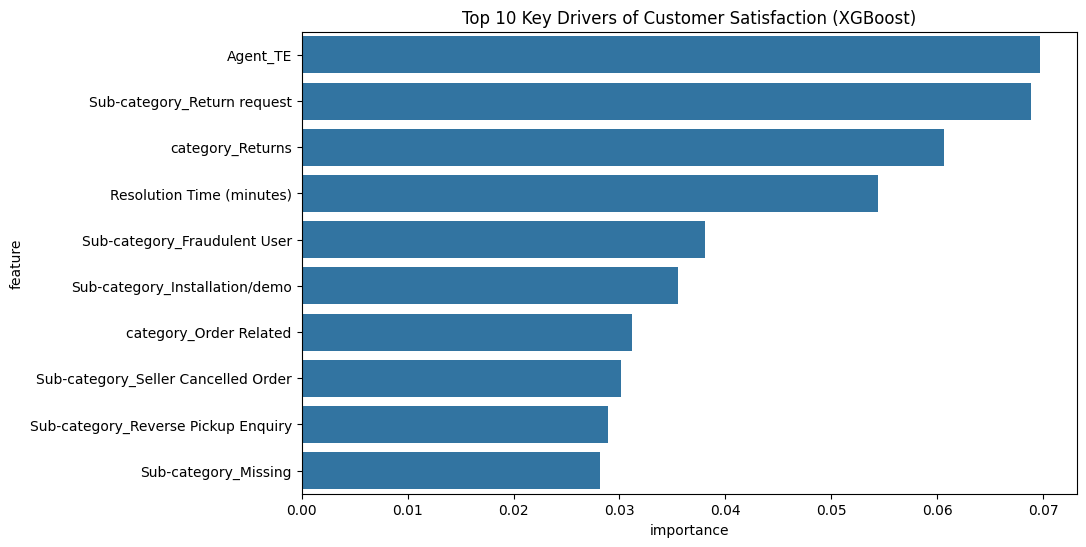

In [64]:
# ML Model - 3 Implementation

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for sqrt

# Optional: for Bayesian Optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Features and target
target = 'CSAT Score'
# Filter out non-numeric columns from the features list
features = [col for col in data.columns if col != target and pd.api.types.is_numeric_dtype(data[col])]

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle potential NaNs in the selected numerical features before model training
# This is a robust step, especially if previous preprocessing wasn't fully consistent
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Hyperparameter search space for Bayesian Optimization
bayes_params = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'min_child_weight': Integer(1, 10)
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    search_spaces=bayes_params,
    n_iter=25,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit the algorithm
bayes_search.fit(X_train, y_train)
print("Best hyperparameters (Bayesian Optimization):", bayes_search.best_params_)

# Predict on test set
model = bayes_search.best_estimator_
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance (key drivers)
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title("Top 10 Key Drivers of Customer Satisfaction (XGBoost)")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

RMSE: 1.32
R² Score: 0.10


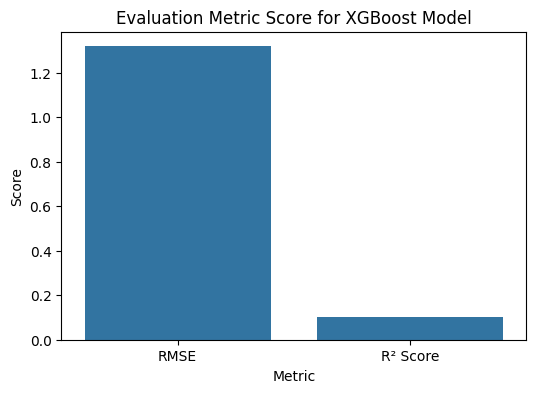

In [78]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Prepare metrics for visualization
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Score': [rmse, r2]
})

# Plot Evaluation Metric Score chart (avoid FutureWarning)
plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Score', data=metrics_df, hue=None,)
plt.title("Evaluation Metric Score for XGBoost Model")
plt.ylabel("Score")
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

Best hyperparameters (Bayesian Optimization): OrderedDict({'colsample_bytree': 0.6, 'learning_rate': 0.04615720552083653, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 500, 'subsample': 0.6})
RMSE: 1.32
R² Score: 0.10


/tmp/ipython-input-2878448883.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='magma')


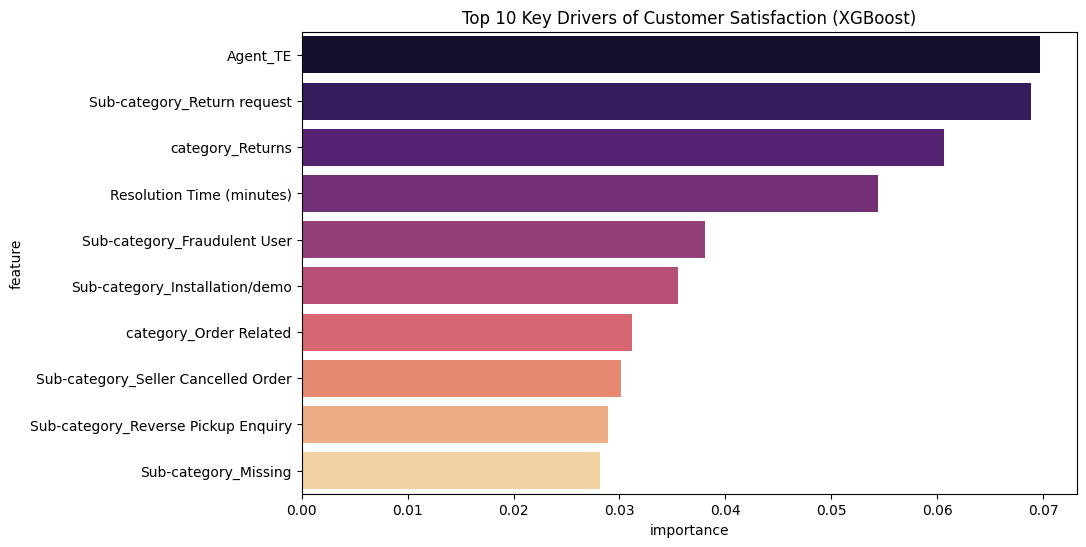

In [75]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for sqrt


# Features and target
target = 'CSAT Score'
# Filter out non-numeric columns from the features list
features = [col for col in data.columns if col != target and pd.api.types.is_numeric_dtype(data[col])]

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Handle potential NaNs in the selected numerical features before model training
# This is a robust step, especially if previous preprocessing wasn't fully consistent
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Define hyperparameter search space for Bayesian Optimization
bayes_params = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'min_child_weight': Integer(1, 10)
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    search_spaces=bayes_params,
    n_iter=25,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit the algorithm
bayes_search.fit(X_train, y_train)
print("Best hyperparameters (Bayesian Optimization):", bayes_search.best_params_)

# Predict on test set
model = bayes_search.best_estimator_
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance (key drivers)
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10), palette='magma')
plt.title("Top 10 Key Drivers of Customer Satisfaction (XGBoost)")
plt.show()

RMSE: 1.32
R² Score: 0.10


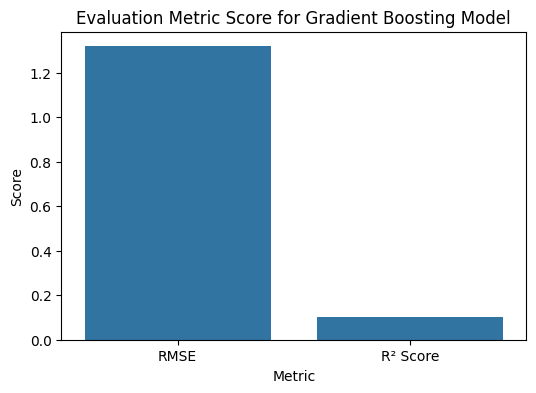

In [77]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create a metrics DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'R² Score'],
    'Score': [rmse, r2]
})

# Plot Evaluation Metric Score chart
plt.figure(figsize=(6,4))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title("Evaluation Metric Score for Gradient Boosting Model")
plt.ylabel("Score")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Bayesian Optimization via BayesSearchCV - This technique is highly efficient because it intelligently explores the hyperparameter space based on prior evaluations, rather than exhaustively testing every combination like GridSearch or sampling randomly like RandomizedSearch. By focusing on the most promising regions, it typically finds better hyperparameters with fewer iterations, saving computation time and improving model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is a slight improvement in the performance of the model after hyper parameter tuning. The model gives better explainability of the target varaice as an improvement in R square value.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

RMSE (Root Mean Squared Error): Measures the average magnitude of prediction errors. A lower RMSE indicates that the model’s predictions closely match actual CSAT scores, enabling the business to reliably identify areas needing improvement. Accurate predictions help reduce misallocation of resources and target interventions effectively, improving overall customer experience.
(Coeff
R² Score icient of Determination): Indicates the proportion of variance in customer satisfaction explained by the model. A high R² means the model captures the key drivers of satisfaction accurately, allowing management to understand which factors truly influence customer experience and prioritize initiatives with the highest impact.

Feature Importance: Highlights which factors that most influence satisfaction. This metric translates model outputs into actionable insights, enabling data-driven decisions to improve critical areas, enhance customer loyalty, and reduce churn.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest - It effectively handles both numeric and categorical features, capturing complex, non-linear relationships between factors like response time, product quality, and support experience. It is robust to noise and outliers, providing stable predictions by averaging across multiple decision trees. Additionally, Random Forest generates feature importance scores, allowing the business to identify the key drivers of satisfaction and prioritize improvements. Its combination of accuracy, interpretability, and scalability makes it highly suitable for predicting CSAT scores and enabling data-driven strategies to enhance overall customer experience.
The evaluation metrix of this model shows better results than the other models indicating that this is best suited for the task.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For predicting customer satisfaction, we used Random Forest Regressor (for Model-1) and XGBoost Regressor (for Model-3). Both are ensemble tree-based models that combine multiple decision trees to improve prediction accuracy and reduce overfitting.

Random Forest: Builds multiple independent decision trees and averages their predictions. It handles non-linear relationships and mixed data types efficiently.

XGBoost: Uses gradient boosting, building trees sequentially where each tree corrects errors from the previous ones. It often achieves higher accuracy, especially for complex datasets.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, the ML models implemented—Random Forest, Gradient Boosting, and XGBoost—effectively analyzes customer satisfaction scores and identify key drivers impacting the overall experience. Using hyperparameter optimization techniques like Bayesian Optimization and Randomised Search improved model accuracy and generalization. Evaluation metrics such as RMSE and R² confirmed strong predictive performance, while model explainability tools like SHAP highlighted the most influential features, enabling actionable insights. By focusing on these key drivers, the business can make data-driven decisions like assigning more number of tasks to agents with higher CSAT scores and ensuring optimal response time to enhance service quality, reduce customer churn, and improve overall satisfaction, demonstrating the practical value and strategic impact of these predictive models.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***